<a href="https://colab.research.google.com/github/evmpython/CAT016_2025/blob/main/CAT016_Radar_meteorologico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#**Disciplina CAT016** - Radares: Uso e Aplicações em Ciências Atmosféricas

---

**OBJETIVO:**
 - A parte prática da disciplina de radares tem como objetivo ensinar os alunos como processar, gerar e analisar os produtos provenientes de radares meteorológicos.


---

**DADOS:**
- Serão utilizados os dados volumétricos em formato HDF5 do radar de [Salesópolis](https://www.saisp.br/estaticos/sitenovo/home.html). Esses dados de radar são referentes ao desastre natural que provocou as [**Enchentes e deslizamentos de terra no Litoral Norte de São Paulo entre os dias 18 e 19 de fevereiro de 2023**](https://floodlist.com/america/brazil-floods-sao-paulo-february-2023). Este evento foi [histórico](https://www.bbc.com/portuguese/articles/cydngmz112mo) e afetou as cidades de Ubatuba, São Sebastião, Guarujá, Ilhabela, Caraguatatuba e Bertioga e produziu precipitação de **680 mm em 24 h**, provocando a morte de [**65 pessoas (64 em São Sebastião e 1 em Ubatuba)**](https://pt.wikipedia.org/wiki/Enchentes_e_deslizamentos_de_terra_no_Litoral_Norte_de_S%C3%A3o_Paulo_em_2023).

- Serão utilizados dados auxiliares que estão disponiveis no [GitHub](https://github.com/evmpython/CAT016_2025) da disciplina, que são:
    1. Arquivos shapefiles dos estados brasileiros
    2. Arquivo excell com a localização dos munícipios brasileiros

---

**PROCEDIMENTO REALIZADO:**
- Os seguinte passo-a-passo é realizado na parte prática dessa disciplina:

1. 1° Passo: Instalando as bibliotecas
2. 2° Passo: Montando drive
3. 3° Passo: Importando bibliotecas
4. 4° Passo: Caminho do diretório
5. 5° Passo: Definindo funções
6. **AULA 01** - Localização do radar
7. **AULA 02** - Conhecendo os dados do radar com a biblioteca Py-ART
8. **AULA 03** - Estratégia de varredura do radar
9. **AULA 04** - Plan Position Indicator (PPI)
10. **AULA 05** - Constant Altitude Plan Position Indicator (CAPPI)
11. **AULA 06** - Seção transversal vertical através do CAPPI
12. **AULA 07** - Variáveis polarimétricas
13. **AULA 08** - Máxima refletividade
14. **AULA 09** - Vento radial
15. **AULA 10** - Estimativa de precipitação
16. **AULA 11** - Acumulado de precipitação
17. **AULA 12** - Classificação de hidrometeoros
18. **AULA 13** - Classificação convectivo/estratiforme
19. **AULA 14** - Perfis verticais de radar
20. **AULA 15** - Combinação de dados de radar com relâmpagos
---

**PREPARAÇÃO**:
1. Fazer o upload desse código para o seu Google Drive.

---

**OBSERVAÇÕES IMPORTANTES**:
1. Este código foi desenvolvido para ser processado no [Google Colaboratory](https://colab.research.google.com/).
2. Os dados estão disponíveis no [github da disciplina](https://github.com/evmpython/CAT016_2025).

---

**PROFESSOR:**

 - Enrique Vieira Mattos - UNIFEI: enrique@unifei.edu.br / https://github.com/evmpython
 - Atualizado em: 25/03/2025

---

# **1° Passo:** Instalando as bibliotecas

Neste passo instalaremos as bibliotecas necessárias para a execução do código. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **[ultraplot](https://github.com/Ultraplot/ultraplot):** Trabalhar com mapas mais bem elaborados
*   **[cartopy](https://github.com/SciTools/cartopy):** Trabalhar com mapas. É utilizado como background pelo ultraplot
*   **[salem](https://salem.readthedocs.io/en/stable/):** Leitura de arquivos shapefiles
*   **[pyart](https://arm-doe.github.io/pyart/):** Processar dados de radar
*   **[wradlib](https://github.com/wradlib/wradlib):** Processar dados de radar
*   **[bmi-topography](https://bmi-topography.csdms.io/en/latest/):** Dados de topografia


A instalação das bibliotecas levará aproximadamente 45s.

In [ ]:
!pip install -q ultraplot cartopy salem rasterio pyproj geopandas arm_pyart wradlib bmi-topography

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.1/86.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 24.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.9/131.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 

# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Importando bibliotecas

In [ ]:
import pyart                             # Biblioteca para trabalhar com dados de radar
import wradlib as wrl                    # Biblioteca para trabalhar com dados de radar
import ultraplot as uplt                 # Biblioteca para plotar mapas elaborados
import matplotlib.pyplot as plt          # Biblioteca para gerar gráficos
import cartopy.crs as ccrs               # Biblioteca para trabalhar com projeções de mapas
import numpy as np                       # Biblioteca para trabalhar com matrizes
import os                                # Biblioteca para trabalhar com o sistema operacional
import xarray as xr                      # Biblioteca para trabalhar com arrays multidimensionais
import pandas as pd                      # Biblioteca para trabalhar com dataframes
import matplotlib.colors as mcolors      # Paleta de cores
import salem                             # Biblioteca para leitura de shapefiles
import geopy                             # Biblioteca para geocodificação
from geopy import distance               # Função para cálculo de distância
from netCDF4 import num2date             # Função para trabalhar com datas
import glob                              # Bibilioteca para listar os arquivos de um diretório
import time                              # Bibilioteca para contagem do tempo
from bmi_topography import Topography    # Bibilioteca para plotar mapa de topografia

# ignora avisos
import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



# **4° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir =  '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/1_PRIMEIRO_SEMESTRE/CAT016 - RADARES_USO E APLICAÇÕES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT016 - PYTHON PARA RADARES METEOROLOGICOS'

- Criando a pasta de saída ("output")

In [ ]:
os.makedirs(f'{dir}/output/', exist_ok=True)

- URL do GITHUB da nossa disciplina

In [ ]:
url = 'https://github.com/evmpython/CAT016_2025/'

# **5° Passo:** Define funções

In [ ]:
#-----------------------------------------------------------------------------------
#       Função que plota os círculos de distância de um radar meteorológico
#-----------------------------------------------------------------------------------
def evm_plota_aneis_em_geral(aneis, lon_r, lat_r, color, label):

    """
    Retorna círculos de distância centrado no radar

    Parâmetros de entrada:
                           aneis (lista): tamanho do raio do círculo em km
                           lon_r (float): valor da longitude do centro do círculo em graus
                           lat_r (float): valor da latitude do centro do círculo em graus
                           color (str): cor do raio do círculo
                           label (str): legenda

    Parâmetros de saída:
                         latitude e longitude que delimita os círculos de distância centrado no radar e plota os círculos

    Exemplo:
             evm_plota_aneis_em_geral([100], -45.97279, -23.600795, 'gray', label='Radar: 100 km')
    """

    origin = geopy.Point(lat_r, lon_r)

    lons = np.zeros((len(aneis), 361))
    lats = np.zeros((len(aneis), 361))

    for i, dis in enumerate(aneis):

        xpts = []
        ypts = []

        for az in range(361):

            destination = distance.distance(kilometers=dis).destination(origin, az)
            lat2, lon2 = destination.latitude, destination.longitude
            xpts.append(lon2)
            ypts.append(lat2)

        lons[i,:] = xpts[:]
        lats[i,:] = ypts[:]

    for i, anel in enumerate(aneis):
        ax.plot(lons[i,:], lats[i,:], color=color, label= label, lw=0.5)

#**AULA 01** - LOCALIZAÇÃO DO RADAR


O objetivo da `Aula 01` é plotarmos a localização do radar meteorológico e os anéis de distância. A figura também conterá o mapa de relevo da região e a localização de algumas cidades e o contorno e sigla dos estados.

Nesse código da Aula 01 serão realizados os seguintes procedimentos:

 * Leitura do arquivo do radar

 * Leitura do dado de relevo

 * Plota figura
    - Define a configuração do gráfico
    - Plota mapa de relevo
    - Plota localização do radar
    - Plota contorno dos estados
    - Plota siglas dos estados
    - Plota anéis de distância do radar
    - Plota localização de algumas cidades
    - Plota barra de cores
    - Plota legenda da figura
    
 * Salva figura  

- Baixando o arquivo do radar. Iremos baixar esse arquivo do radar diretamente do [GitHub](https://github.com/evmpython/CAT016_2025) da nossa disciplina. Para isto utilizaremos o comando do Linux denominado `wget`.

In [ ]:
!wget {url}raw/main/input/PNOVA2-20230218230002.HDF5

--2025-03-26 01:34:15--  https://github.com/evmpython/CAT016_2025/raw/main/input/PNOVA2-20230218230002.HDF5
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT016_2025/main/input/PNOVA2-20230218230002.HDF5 [following]
--2025-03-26 01:34:16--  https://raw.githubusercontent.com/evmpython/CAT016_2025/main/input/PNOVA2-20230218230002.HDF5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8181848 (7.8M) [application/octet-stream]
Saving to: ‘PNOVA2-20230218230002.HDF5’

PNOVA2-202302182300 100%[===================>]   7.80M  --.-KB/s    in 0.04s   

2025-03-26 01:34:16 (183 MB/s) - ‘PNOVA2-20

- Plotando a figura

CPU times: user 17.4 s, sys: 4.19 s, total: 21.6 s
Wall time: 23.3 s


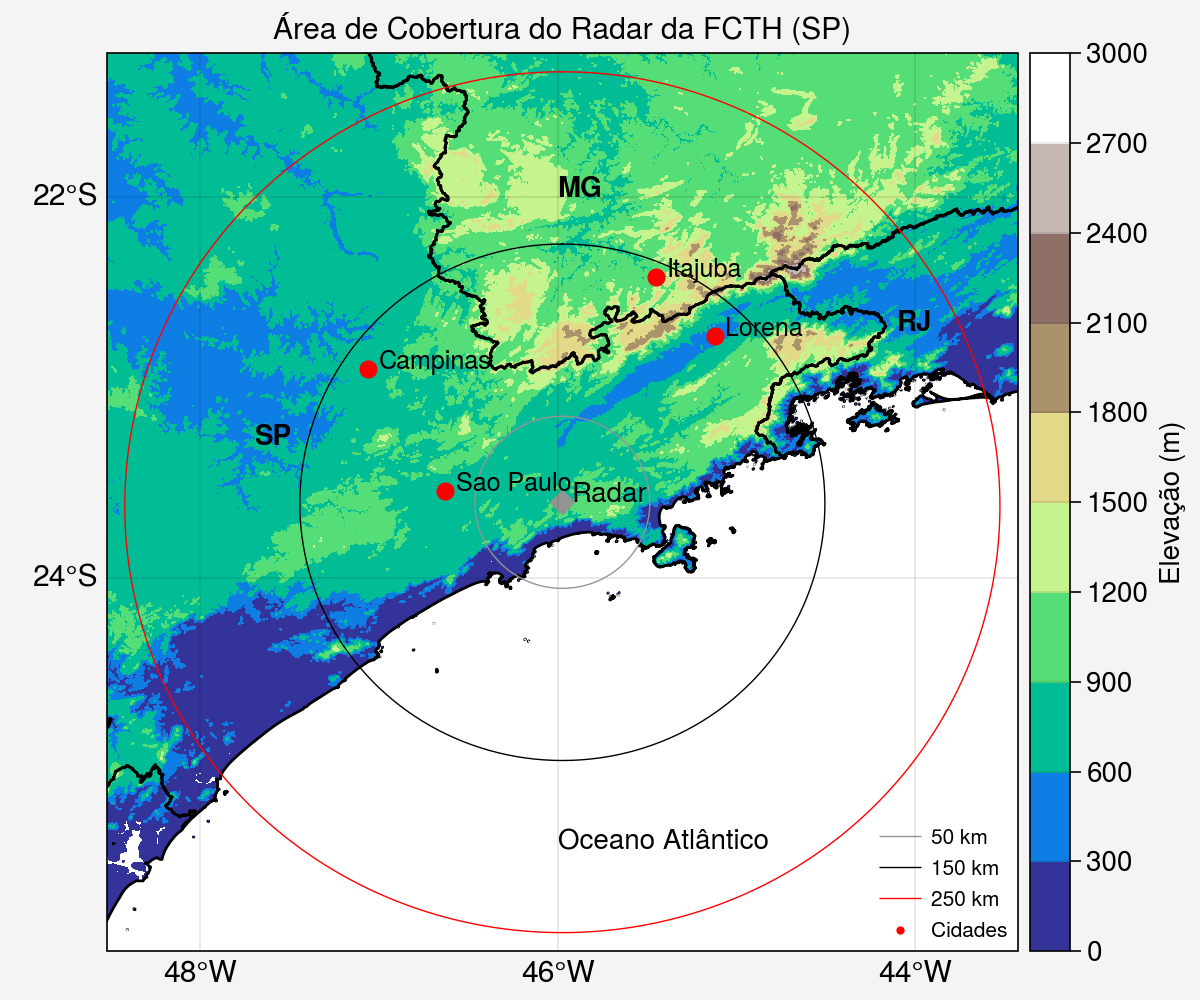

In [ ]:
%%time
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'/content/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# definindo a extensão dos dados em termos de latitude/longitude
lonmin = lonmin-0.2
lonmax = lonmax+0.2
latmin = latmin-0.2
latmax = latmax+0.2

#========================================================================================================================#
#                                             LEITURA DO DADO DE RELEVO
#========================================================================================================================#
# carregando o dado de relevo
topo = Topography(dem_type="SRTMGL3",
                  south=latmin,
                  north=latmax,
                  west=lonmin,
                  east=lonmax,
                  output_format="GTiff",
                  cache_dir=".")

# transforma o dado de topografia para Dataset
ds = topo.load()

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
#--------------------------#
#  configuração do gráfico
#--------------------------#
# moldura da figura
fig, ax = uplt.subplots(figsize=(6.0, 5), tight=True, proj='pcarree')

# formatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=2, lonlines=2,
          latlim=(latmin, latmax),
          lonlim=(lonmin, lonmax),
          title='Área de Cobertura do Radar da FCTH (SP)',
          small='15px', large='15px')

#--------------------------#
#        relevo
#--------------------------#
map1 = ax.contourf(ds['x'],
                   ds['y'],
                   ds[0,:,:],
                   cmap='terrain',
                   vmin=0)

#--------------------------#
#   localização do radar
#--------------------------#
# localização do radar
ax.scatter(lon_radar, lat_radar, transform=ccrs.PlateCarree(), marker='D', s=35, color='gray')

# nome "Radar"
plt.text(lon_radar+0.05, lat_radar,'Radar', size=10)

#--------------------------#
# shapefile dos Estados
#--------------------------#
# leitura do shapefile do estados
estados_brasil = salem.read_shapefile('https://github.com/evmpython/CAT016_2025/raw/refs/heads/main/shapefiles/BR_UF_2019.shp')

# seleciona os estados de interesse
estados_selecionado = estados_brasil.loc[ (estados_brasil['SIGLA_UF'] == 'PR') |
                                          (estados_brasil['SIGLA_UF'] == 'SP') |
                                          (estados_brasil['SIGLA_UF'] == 'MG') |
                                          (estados_brasil['SIGLA_UF'] == 'RJ') ]

# plota os estados selecionados
estados_selecionado.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=1, ax=ax)

#--------------------------#
#   siglas dos estados
#--------------------------#
ax.annotate('SP', xy=(-47.7, -23.3), fontsize=10, color='black', weight='bold')
ax.annotate('MG', xy=(-46.0, -22.0), fontsize=10, color='black', weight='bold')
ax.annotate('RJ', xy=(-44.1, -22.7), fontsize=10, color='black', weight='bold')
ax.annotate('Oceano Atlântico', xy=(-46.0, -25.42), fontsize=10, color='black')

#--------------------------#
#     aneis de distância
#--------------------------#
evm_plota_aneis_em_geral([50], lon_radar, lat_radar, 'gray', label='50 km')
evm_plota_aneis_em_geral([150], lon_radar, lat_radar, 'black', label='150 km')
evm_plota_aneis_em_geral([250], lon_radar, lat_radar, 'red', label='250 km')

#--------------------------#
#        cidades
#--------------------------#
# lendo o arquivo CSV com a localização das cidades brasileiras
df = pd.read_csv('https://github.com/evmpython/shapefile/raw/refs/heads/main/municipios_brasil_new.csv', sep=';')

# removendo espaço em branco
df['cidade'] = df['cidade'].str.strip()
df['uf'] = df['uf'].str.strip()

# listas com os nomes das cidades que serão plotadas no mapa
cidades = ['ITAJUBA', 'SAO PAULO', 'CAMPINAS', 'LORENA']

# cria um dataframe vazio
df_cidades = pd.DataFrame()

# loop da lista de cidades
for cidade in cidades:

    # seleciona a cidade
    df_atual = df[ df['cidade'] == cidade][['lat', 'lon']]

    # insere a latitude e longitude da cidade no DataFrame df_cidades
    df_cidades = pd.concat([df_cidades, df_atual])

# acrescenta uma coluna com os nomes das cidades
df_cidades['cidade'] = cidades

# plota a localização das cidades com os nomes
ax.scatter(df_cidades['lon'].values, df_cidades['lat'].values, transform=ccrs.PlateCarree(), marker='o', s=35, color='red', label='Cidades') # localização das cidades
for ilon, ilat, icidade in zip( list(df_cidades['lon']), list(df_cidades['lat']), list(df_cidades['cidade']) ): plt.text(ilon+0.06, ilat, icidade.title()) # nome das cidades

#--------------------------#
#      barra de cor
#--------------------------#
fig.colorbar(map1, loc='right', label='Elevação (m)', ticklabelsize=10, labelsize=10, space=-3.8)

#--------------------------#
#       legenda
#--------------------------#
ax.legend(loc='lr', ncols=1, frameon=False, prop={'size':7.5}, markerscale=0.4)

#========================================================================================================================#
#                                                 SALVA FIGURA
#========================================================================================================================#
fig.save(f'{dir}/output/Aula_01_Area_de_cobertura_radar.png', dpi=300)

In [ ]:
# dado de topografia
ds

<xarray.DataArray 'SRTMGL3' (band: 1, y: 5650, x: 6122)> Size: 69MB
[34589300 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 49kB -48.52 -48.52 -48.52 ... -43.42 -43.42 -43.42
  * y            (y) float64 45kB -21.25 -21.25 -21.25 ... -25.95 -25.95 -25.95
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     0
    scale_factor:   1.0
    add_offset:     0.0
    units:          degrees

In [ ]:
# tabela da localização das cidades brasileiras
df

id    lat    lon          cidade  uf
0        1  -9.82 -66.88      ACRELANDIA  AC
1        2 -10.94 -69.56    ASSIS BRASIL  AC
2        3 -11.01 -68.74       BRASILEIA  AC
3        4  -9.83 -67.95          BUJARI  AC
4        5 -10.57 -67.67        CAPIXABA  AC
...    ...    ...    ...             ...  ..
5504  5505  -6.32 -47.41  TOCANTINOPOLIS  TO
5505  5506  -8.97 -48.18        TUPIRAMA  TO
5506  5507  -8.39 -48.11      TUPIRATINS  TO
5507  5508  -6.84 -47.96    WANDERLANDIA  TO
5508  5509  -6.41 -48.53         XAMBIOA  TO

[5509 rows x 5 columns]

Realize as seguintes modificações:


1.   Altere a colormap do mapa de topografia
2.   Plote diferentes distâncias dos aneis e mude as cores
3.   Plote a localização de outras cidades
4.   Altere o símbolo e a cor da localização do radar



#**Informações sobre as bibliotecas `Py-ART` e `Wradlib`**

------

**Python ARM Radar Toolkit (Py-ART)**:

------



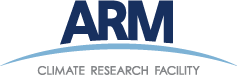

A Py-ART é uma biblioteca de código aberto que fornece uma série de funcionalidades para leitura, processamento e visualização de dados de radares meteorológicos. Py-ART é usada pela comunidade do [Atmospheric Radiation Measurement (ARM)](https://www.arm.gov/)
para trabalhar com dados de radar e demais usuários da comunidade de radar em geral. A biblioteca oferece os seguintes recursos:

1. Leitura de formatos de dados de radar comuns, incluindo formatos nativos de diferentes fabricantes de radares.

2. Pré-processamento de dados, incluindo filtragem de ruído, correção de atenuação e interpolação.

3. Detecção de alvos meteorológicos, como precipitação, nuvens e tempestades.

4. Extração de parâmetros meteorológicos, como refletividade, velocidade radial e espectro de Doppler.

5. Visualização e plotagem de dados de radar em várias formas, incluindo imagens de refletividade, campos de vento e perfis verticais.

Para maiores informações sobre a biblioteca **Py-ART**:
- Pypi: https://pypi.org/project/arm-pyart/
- GitHub: https://github.com/ARM-DOE/pyart
- Documentação: https://arm-doe.github.io/pyart/
- Exemplos: https://arm-doe.github.io/pyart/examples/index.html
- Sites adicionais:
    1. https://openradarscience.org/erad2022/README.html
    2. https://openradarscience.org/
    3. https://github.com/mgrover1/ams-open-radar-2023
    4. https://xarray.dev/blog/introducing-xradar
- Artigo: Helmus, J.J. & Collis, S.M., (2016). The Python ARM Radar Toolkit (Py-ART), a Library for Working with Weather Radar Data in the Python Programming Language. Journal of Open Research Software. 4(1), p.e25. DOI: http://doi.org/10.5334/jors.119

----

**An Open Source Library for Weather Radar Data Processing (Wradlib)**:

------


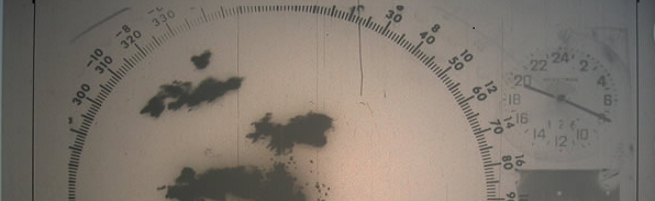

A Wradlib é uma biblioteca python que foi desenvolvida com a finalidade de processamento e análise de dados de radar meteorológico. Especificamente o foco da Wradlib é realizar processamento, leitura de direntes formatos, georeferenciamento, cálculo de precipitação, identificação e correção de fontes de erros (clutter e atenuação) e visualização de dados. Uma das principais características da wradlib é sua capacidade de corrigir o efeito de atenuação nos dados de radar.


Para maiores informações sobre a biblioteca **Wradlib**:
- Pypi: https://pypi.org/project/wradlib/
- GitHub: https://github.com/wradlib/wradlib
- Documentação: https://docs.wradlib.org/en/latest/
- Exemplos: https://docs.wradlib.org/en/latest/notebooks/plotting.html


----

Em resumo, a `Py-ART` é uma biblioteca mais abrangente e geral para processamento, visualização e análise de dados de radar meteorológico, enquanto a `Wradlib` é mais especializada em processamento e análise de dados de radar, com ênfase na correção de atenuação e no formato de dados ODIM H5. A escolha entre as duas bibliotecas depende das necessidades específicas do projeto e das funcionalidades desejadas. Tanto a `Py-ART` quanto a `Wradlib` têm comunidades ativas de usuários e desenvolvedores. No entanto, a `Py-ART` tem uma comunidade um pouco maior, sendo mais amplamente utilizada em diferentes aplicações, o que pode significar mais recursos disponíveis e um suporte mais abrangente.

----

Embora nesse curso utilizaremos apenas as bibliotecas `Py-ART` e `Wradlib` para tratar os dados de radar meteorológico, existem diversas outras bibliotecas para diferente finalidades para trabalhar com dados de radar, por exemplo:

---

1. [Pyrad - Python Radar Data Processing](https://github.com/MeteoSwiss/pyrad): framework de processamento de dados de radar em tempo real desenvolvido pela MeteoSwiss e MeteoFrance.

2. [PyDDA -A Pythonic Multiple Doppler Radar Wind Retrieval Package](https://github.com/openradar/PyDDA): pacote python para estimar vento em 3D (u,v,w) usando multíplos radares através de assimilação de dados 3D.


3. [Tobac - Tracking and Object-Based Analysis of Clouds](https://tobac.readthedocs.io/en/latest/): pacote python para rapidamente identificar, rastrear e analisar nuvens proveniente de diferentes tipos de dados em grade, tais como sáida produzidas por cloud-resolving model ou estimativa 2D dde dados de satelites.


4. [TINT Is Not TITAN (TINT) - A Package for Storm Cell Tracking In Python](https://github.com/mjucker/tintV2): pacote python desenvolvido para rastrear qualquer tipo de dado de entrada. Sua versão anterior [TINT](https://github.com/openradar/TINT/)

5. [TATHU - Tracking and Analysis of Thunderstorms](https://github.com/uba/tathu/): pacote python desenvolvido pelo CPTEC/INPE para rastrear e analisar ciclo de vida de Sistemas Convectivos através de imagens de satélite e radar meteorológico.

6. [Pysteps - Python framework for short-term ensemble prediction systems](https://github.com/pySTEPS/pysteps): pacote python usado para nowcasting de precipitação.

7. [Xradar](https://github.com/openradar/xradar): utilizado para transformar dados de radares para o formato do Xarray. [Maiores informações](https://docs.openradarscience.org/projects/xradar/en/stable/index.html).



#**AULA 02** - CONHECENDO OS DADOS DO RADAR COM A BIBLIOTECA Py-ART

##**a) Leitura do arquivo do radar**
 - Vamos abrir um arquivo do radar de Salesópolis para entendermos sobre as informações dados disponíveis.

In [ ]:
# nome do arquivo
filename = 'PNOVA2-20230218230002.HDF5'

- O **Py-ART** possui diversas funções para leitura de dados de radar:
    1. **pyart.io**
    2. **pyart.aux_io**



1. As funções básicas são denominadas de [**pyart.io**](https://arm-doe.github.io/pyart/API/generated/pyart.io.html#module-pyart.io): são funções para ler e escrever dados de radar de diversos formatos. Na maioria dos casos a função **pyart.io.read()** é utilizada. Em outros casos, funções específicas são utilizadas, como por exemplo a função **pyart.io.read_uf()**, utilizada para ler arquivos em formato UF.

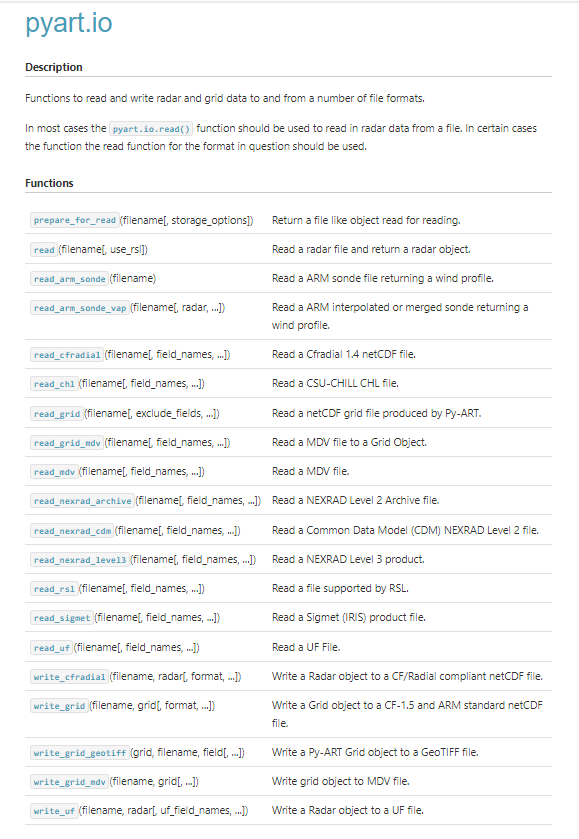

2. Além das funções básicas (**pyart.io**), nós temos as funções auxiliares para leitura dos arquivos de radar. São funções adicionais para leitura e escrita de formatos de arquivos de radar. Essas funções são denominadas de [**pyart.aux_io**](https://arm-doe.github.io/pyart/API/generated/pyart.aux_io.html). Por exemplo para lermos os dados ODIM, utilizaríamos a função [**pyart.aux_io.read_odim_h5**](https://arm-doe.github.io/pyart/API/generated/pyart.aux_io.read_odim_h5.html).

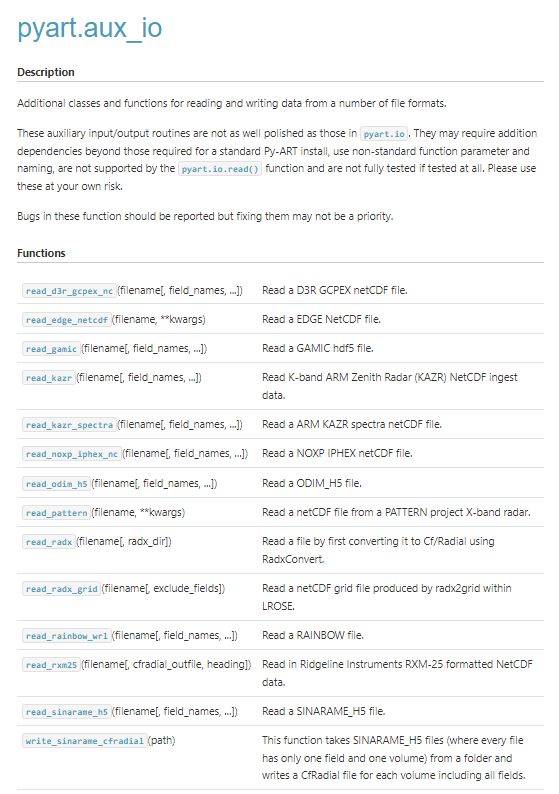

* Para ler os dados do radar de **Salesópolis** usaremos a função **[aux_io.read_gamic](https://arm-doe.github.io/pyart/API/generated/pyart.aux_io.read_gamic.html)**.

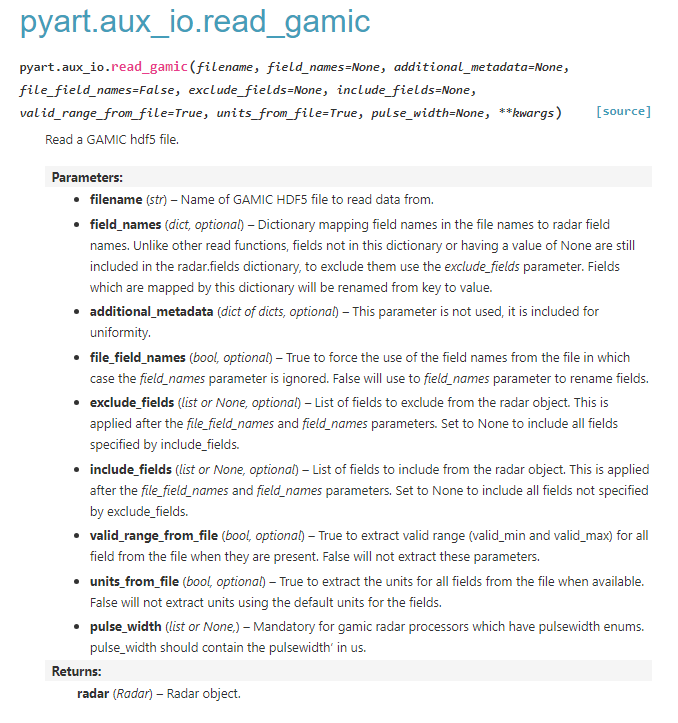

Vamos conferir quais argumentos têm a função `aux_io.read_gamic()`. Para isto basta colocarmos um sinal de interrogação depois do nome da função.

In [ ]:
# conferindo os argumentos e saídas da função
pyart.aux_io.read_gamic?

In [ ]:
# leitura do dado
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

In [ ]:
radar

##**b) Variáveis disponíveis**
 - Diferentes tipos de radar podem oferecer diferentes variáveis. O radar de Salesópolis é um radar Banda-S de dupla polarização e fornece ao todo `nove variáveis`.

In [ ]:
# exibindo as chaves dos campos do objeto radar
radar.fields.keys()

dict_keys(['corrected_reflectivity', 'reflectivity', 'corrected_velocity', 'spectrum_width', 'corrected_differential_reflectivity', 'corrected_differential_phase', 'differential_phase', 'specific_differential_phase', 'cross_correlation_ratio'])

As seguintes variáveis são fornecidas pelo radar de Salesópolis:

---

1.  `corrected_reflectivity`:
 - Refletividade corrigida para extração de clutter (expressa em dBZ). Possui relação com o tamanho e quantidade de hidrometeoros.

---

2.  `reflectivity`:
 - Refletividade **não** corrigida (expressa em dBZ). Possui relação com o tamanho e quantidade de hidrometeoros.

---

3.  `corrected_velocity`:  
 - Velocidade radial corrigida (expressa em m/s). Possui relação com a velocidade radial dos hidrometeoros.

---

4.  `spectrum_width`:
 - Largura de espectro (expressa em m/s).

---

5.  `corrected_differential_reflectivity`:
 - Refletividade diferencial corrigida (expressa em dB), conhecida como ZDR. Possui relação com a orientação, grau de achatamento dos hidrometeoros.

---

6.  `corrected_differential_phase`:
 - Fase diferencial corrigida (expressa em graus). Representa a diferença de fase entre a onda polarizada horizontal e vertical da radiação.

---


7.  `differential_phase`:
 - Fase diferencial **não** corrigida (expressa em graus). Representa a diferença de fase entre a onda polarizada horizontal e vertical da radiação.

---

8.  `specific_differential_phase`:
 - Fase diferencial específica (expressa em graus/km), conhecida como KDP. Possui relação com a orientação, grau de achatamento e concentração dos hidrometeoros.

---

9.  `cross_correlation_ratio`: coeficiente de correlação (adimensional), conhecida como $\rho_{HV}$. Possui relação com grau de mistura dos hidrometeoros, fase das partículas (líquida ou gelo) e diversidade de formatos e orientações.
---

Maiores informações sobre a teoria de radares meteorológicos e variáveis polarimétricas, podem ser encontradas nos seguintes livros:
1. RINEHART,  R.  E. **Radar  for  meteorologists**. 5  ed.:  Rinehart  Publications, 2010.
2. BRINGI,  V.;  CHANDRASEKAR,  V. **Polarimetric  doppler  weather  radar: principles and applications**. 5°ed.: Cambridge University Press, 2001, 636 p



##**c) Parâmetros do radar**

O radar possui diversos parâmetros, como: Frequência, Pulse Repetition Frequency (PRF), largura do feixe e etc. Todas estas informações podem ser acessadas no objeto `radar` através do método `instrument_parameters`.

In [ ]:
# mostra as informações disponíveis
radar.instrument_parameters.keys()

dict_keys(['frequency', 'radar_beam_width_h', 'radar_beam_width_v', 'pulse_width', 'prt', 'prt_mode', 'prt_ratio', 'unambiguous_range', 'nyquist_velocity', 'n_samples'])

In [ ]:
# outra forma se mostrar as informações, seria:
radar.instrument_parameters

{'frequency': {'units': 's-1',
  'meta_group': 'instrument_parameters',
  'long_name': 'Radiation frequency',
  'data': array([2.8181281e+09], dtype=float32)},
 'radar_beam_width_h': {'units': 'degrees',
  'meta_group': 'radar_parameters',
  'long_name': 'Antenna beam width H polarization',
  'data': array([0.968], dtype=float32)},
 'radar_beam_width_v': {'units': 'degrees',
  'meta_group': 'radar_parameters',
  'long_name': 'Antenna beam width V polarization',
  'data': array([0.968], dtype=float32)},
 'pulse_width': {'units': 'seconds',
  'comments': 'Pulse width',
  'meta_group': 'instrument_parameters',
  'long_name': 'Pulse width',
  'data': array([1.e-06, 1.e-06, 1.e-06, ..., 5.e-07, 5.e-07, 5.e-07], dtype=float32)},
 'prt': {'units': 'seconds',
  'comments': 'Pulse repetition time. For staggered prt, also see prt_ratio.',
  'meta_group': 'instrument_parameters',
  'long_name': 'Pulse repetition time',
  'data': array([0.00181818, 0.00181818, 0.00181818, ..., 0.00093458, 0.000934

Vamos acessar as informações sobre a `frequência da radiação` do feixe do radar.

In [ ]:
radar.instrument_parameters['frequency']

{'units': 's-1',
 'meta_group': 'instrument_parameters',
 'long_name': 'Radiation frequency',
 'data': array([2.8181281e+09], dtype=float32)}

Para transformar a frequência em comprimento de onda, basta dividir a velocidade da luz pelo valor da frequência. O resultado será em metros. Para transformar para centímetros basta multiplicarmos o resultado por 100.

In [ ]:
comprimento_onda_m = 3e+08 / float(radar.instrument_parameters['frequency']['data'])
comprimento_onda_m

0.10645364098931416

In [ ]:
comprimento_onda_cm = comprimento_onda_m * 100.
comprimento_onda_cm

10.645364098931417

Veja que temos um dicionário. Iremos salvar a frequência da radiação na variável `radar_frequency`.

In [ ]:
radar_frequency = radar.instrument_parameters['frequency']['data'][0]
radar_frequency

2818128100.0

Vamos acessar as informações sobre a largura do feixe.

In [ ]:
radar.instrument_parameters['radar_beam_width_h']

{'units': 'degrees',
 'meta_group': 'radar_parameters',
 'long_name': 'Antenna beam width H polarization',
 'data': array([0.968], dtype=float32)}

Veja que temos um dicionário. Iremos salvar o ângulo de abertura do feixe na variável `radar_beam_width`.

In [ ]:
radar_beam_width = radar.instrument_parameters['radar_beam_width_h']['data'][0]
radar_beam_width

0.968

##**d) Latitude, longitude e altura do radar**

In [ ]:
# mostrando as chaves da "latitude"
radar.latitude.keys()

dict_keys(['long_name', 'standard_name', 'units', 'data'])

In [ ]:
# vejam que a latitude é um dicionário (ie, é estruturada na forma "chave": "valor")
radar.latitude

{'long_name': 'Latitude',
 'standard_name': 'Latitude',
 'units': 'degrees_north',
 'data': array([-23.600795])}

In [ ]:
# mostrando o valor da chave "long_name"
radar.latitude['long_name']

'Latitude'

In [ ]:
# vejam que a longitude é um dicionário (ie, "chave": "valor")
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-45.97279])}

In [ ]:
# extrai a latitude e longitude do radar. "Data" é um array, portanto precisamos indicar qual posição queremos.
# no caso queremos a primeira, porém ele só possui um valor.
lat_radar = radar.latitude['data'][0]
lon_radar = radar.longitude['data'][0]
alt_radar = radar.altitude['data'][0]

print('O valor da latitude (graus) =', lat_radar)
print('O valor da longitude (graus) =', lon_radar)
print('Altura(m) =', radar.altitude['data'][0])

O valor da latitude (graus) = -23.600795
O valor da longitude (graus) = -45.97279
Altura(m) = 928.0


##**e) Tempo do volscan do radar**

In [ ]:
# vejam que o "time" é um dicionário (ie, "chave": "valor")
radar.time

{'units': 'seconds since 2023-02-18T23:00:02Z',
 'standard_name': 'time',
 'long_name': 'time_in_seconds_since_volume_start',
 'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([  0.,   0.,   0., ..., 222., 222., 222.])}

In [ ]:
# tempo inicial do radar em segundos desde o inicio do scan do radar
radar.time['units']

'seconds since 2023-02-18T23:00:02Z'

In [ ]:
# tempo final do radar em segundos desde o inicio do scan do radar
radar.time['data'][-1]

222.0

In [ ]:
print('Data imagem do radar=', pyart.util.datetime_from_grid(radar))
print('Unidades do tempo=', radar.time['units'])
print('Início do volcan=', num2date(radar.time['data'][0], radar.time['units'] ))
print('Fim do volcan=', num2date(radar.time['data'][-1], radar.time['units'] ))

Data imagem do radar= 2023-02-18 23:00:02
Unidades do tempo= seconds since 2023-02-18T23:00:02Z
Início do volcan= 2023-02-18 23:00:02
Fim do volcan= 2023-02-18 23:03:44


In [ ]:
# extrai a data inicial e final do scan em no formato "cftime._cftime.DatetimeGregorian"
data_ini = num2date(radar.time['data'][0], radar.time['units'] )
data_end = num2date(radar.time['data'][-1], radar.time['units'] )

# extrai ano,mes,dia,hora,minuto e segundos
print(data_ini.year, data_ini.month, data_ini.day, data_ini.hour, data_ini.minute, data_ini.second)
print(data_end.year, data_end.month, data_end.day, data_end.hour, data_end.minute, data_end.second)

2023 2 18 23 0 2
2023 2 18 23 3 44


In [ ]:
# extra a data da imagem
ano = str(pyart.util.datetime_from_grid(radar).year)
mes = str(pyart.util.datetime_from_grid(radar).month).zfill(2)
dia = str(pyart.util.datetime_from_grid(radar).day).zfill(2)
hor = str(pyart.util.datetime_from_grid(radar).hour).zfill(2)
min = str(pyart.util.datetime_from_grid(radar).minute).zfill(2)

print(ano, mes, dia, hor, min)

2023 02 18 23 00


##**f) Bins (range)**

In [ ]:
# quantidade de elevações
nsweeps = radar.nsweeps
nsweeps

8

In [ ]:
# quantidade TOTAL de bins do feixe
ngates = radar.ngates
ngates

960

In [ ]:
# quantidade TOTAL de azimutes
nrays = radar.nrays
nrays

2881

In [ ]:
# exibindo as chaves de "range"
radar.range.keys()

dict_keys(['units', 'standard_name', 'long_name', 'axis', 'spacing_is_constant', 'comment', 'data', 'meters_to_center_of_first_gate', 'meters_between_gates'])

In [ ]:
# vejam que o "range" é um dicionário (ie, "chave": "valor")
radar.range

{'units': 'meters',
 'standard_name': 'projection_range_coordinate',
 'long_name': 'range_to_measurement_volume',
 'axis': 'radial_range_coordinate',
 'spacing_is_constant': 'true',
 'comment': 'Coordinate variable for range. Range to center of each bin.',
 'data': array([     0.,    250.,    500.,    750.,   1000.,   1250.,   1500.,
          1750.,   2000.,   2250.,   2500.,   2750.,   3000.,   3250.,
          3500.,   3750.,   4000.,   4250.,   4500.,   4750.,   5000.,
          5250.,   5500.,   5750.,   6000.,   6250.,   6500.,   6750.,
          7000.,   7250.,   7500.,   7750.,   8000.,   8250.,   8500.,
          8750.,   9000.,   9250.,   9500.,   9750.,  10000.,  10250.,
         10500.,  10750.,  11000.,  11250.,  11500.,  11750.,  12000.,
         12250.,  12500.,  12750.,  13000.,  13250.,  13500.,  13750.,
         14000.,  14250.,  14500.,  14750.,  15000.,  15250.,  15500.,
         15750.,  16000.,  16250.,  16500.,  16750.,  17000.,  17250.,
         17500.,  17750.,

In [ ]:
# exibindo a chave "units" de range
radar.range['units']

'meters'

In [ ]:
# exibindo a chave "data" de range
radar.range['data']

array([     0.,    250.,    500.,    750.,   1000.,   1250.,   1500.,
         1750.,   2000.,   2250.,   2500.,   2750.,   3000.,   3250.,
         3500.,   3750.,   4000.,   4250.,   4500.,   4750.,   5000.,
         5250.,   5500.,   5750.,   6000.,   6250.,   6500.,   6750.,
         7000.,   7250.,   7500.,   7750.,   8000.,   8250.,   8500.,
         8750.,   9000.,   9250.,   9500.,   9750.,  10000.,  10250.,
        10500.,  10750.,  11000.,  11250.,  11500.,  11750.,  12000.,
        12250.,  12500.,  12750.,  13000.,  13250.,  13500.,  13750.,
        14000.,  14250.,  14500.,  14750.,  15000.,  15250.,  15500.,
        15750.,  16000.,  16250.,  16500.,  16750.,  17000.,  17250.,
        17500.,  17750.,  18000.,  18250.,  18500.,  18750.,  19000.,
        19250.,  19500.,  19750.,  20000.,  20250.,  20500.,  20750.,
        21000.,  21250.,  21500.,  21750.,  22000.,  22250.,  22500.,
        22750.,  23000.,  23250.,  23500.,  23750.,  24000.,  24250.,
        24500.,  247

In [ ]:
radial_resolution = radar.range['meters_between_gates']
radial_resolution

250.0

##**g) Azimutes**

In [ ]:
# resolução ângular azimutal
radar.ray_angle_res

{'long_name': 'Angular resolution between rays',
 'units': 'degrees',
 'comment': 'Only applicable when rays_are_indexed variable is true',
 'data': array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)}

In [ ]:
# informação apenas da resolução angular azimutal (em graus)
ray_angle_res = radar.ray_angle_res['data'][0]
ray_angle_res

1.0

In [ ]:
# exibindo as chaves de "azimuth"
radar.azimuth.keys()

dict_keys(['units', 'standard_name', 'long_name', 'axis', 'comment', 'data'])

In [ ]:
# vejam que o "azimuth" é um dicionário (ie, "chave": "valor")
radar.azimuth

{'units': 'degrees',
 'standard_name': 'beam_azimuth_angle',
 'long_name': 'azimuth_angle_from_true_north',
 'axis': 'radial_azimuth_coordinate',
 'comment': 'Azimuth of antenna relative to true north',
 'data': array([ 80.01892,  81.0022 ,  82.01843, ..., 291.01135, 292.0111 ,
        293.01636], dtype=float32)}

In [ ]:
# exibindo a chave "units" de azimuth
radar.azimuth['units']

'degrees'

In [ ]:
# quantidade TOTAL de azimutes do dado volumétrico
len(radar.azimuth['data'])

2881

In [ ]:
# exibindo a chave "data" de azimuth
radar.azimuth['data']

array([ 80.01892,  81.0022 ,  82.01843, ..., 291.01135, 292.0111 ,
       293.01636], dtype=float32)

In [ ]:
# exibindo os 10 primeiros valores do azimuth
radar.azimuth['data'][0:10]

array([80.01892 , 81.0022  , 82.01843 , 83.012695, 84.00696 , 85.01221 ,
       86.00647 , 87.01721 , 88.00598 , 89.000244], dtype=float32)

In [ ]:
# exibindo o formato do array de azimute
print('Total de azimutes=', radar.azimuth['data'].shape)

Total de azimutes= (2881,)


##**h) Elevações**

In [ ]:
# vejam que o "sweep" (=elevações) é um dicionário (ie, "chave": "valor")
radar.sweep_start_ray_index

{'long_name': 'Index of first ray in sweep, 0-based',
 'units': 'count',
 'data': array([   0,  360,  720, 1080, 1440, 1800, 2160, 2521], dtype=int32)}

In [ ]:
print('Quantidade de elevações=', radar.sweep_start_ray_index['data'].shape)

Quantidade de elevações= (8,)


In [ ]:
# vejam que o "fixed_angle" (elevações) é um dicionário (ie, "chave": "valor")
radar.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([1. , 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6], dtype=float32)}

In [ ]:
sweeps =  list(radar.fixed_angle['data'])
print('Ângulos de elevação(graus)=', sweeps)

Ângulos de elevação(graus)= [1.0, 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6]


In [ ]:
# acessando o valor de um ângulo de elevação específico
radar.fixed_angle["data"][3]

3.2

In [ ]:
# verificando o número de azimutes para cada elevação
nsweeps = radar.nsweeps
total_azimuths = radar.azimuth['data'].shape[0]
index_azimuths = radar.sweep_start_ray_index['data'].tolist()
index_azimuths.append(total_azimuths)

for i in range(nsweeps):
  print('Numero de azimutes da elevacao ' + str(i) + ': ' + str(index_azimuths[i+1] - index_azimuths[i]))

Numero de azimutes da elevacao 0: 360
Numero de azimutes da elevacao 1: 360
Numero de azimutes da elevacao 2: 360
Numero de azimutes da elevacao 3: 360
Numero de azimutes da elevacao 4: 360
Numero de azimutes da elevacao 5: 360
Numero de azimutes da elevacao 6: 361
Numero de azimutes da elevacao 7: 360


##**i) Dados**

- Repare que a variável **radar.fields['reflectivity']['data']** é uma matriz de **2880 azimutes** por **960 bins**.
- Ou seja **2880** / **360** azimutes = **8** elevações

In [ ]:
# os dados estão alocados numa matriz de 2 dimensões (ie, array de 2 dimensões do numpy), frequentemente mascarado.
print('Dimensão dos dados de refletividade=', radar.fields['reflectivity']['data'].shape)
print('Unidade de refletividade=', radar.fields['reflectivity']['units'])

print('Máxima refletividade=', radar.fields['reflectivity']['data'].max())
print('Minima refletividade=', radar.fields['reflectivity']['data'].min())

Dimensão dos dados de refletividade= (2881, 960)
Unidade de refletividade= dBZ
Máxima refletividade= 82.55098
Minima refletividade= -31.00196


In [ ]:
# exibindo os dados: os dados são salvos numa matriz (array, "data") de duas dimensões (azimutes, bins).
# além disso possui uma mascara para os dados ("mask")
radar.fields['reflectivity']['data']

masked_array(
  data=[[42.70784378051758, 42.70784378051758, 20.296077728271484, ...,
         --, --, --],
        [41.71176528930664, 43.703922271728516, 21.292156219482422, ...,
         --, --, --],
        [42.20980453491211, 42.20980453491211, 22.28823471069336, ...,
         --, --, --],
        ...,
        [--, 38.22549057006836, 6.849019527435303, ..., --, --, --],
        [--, 38.22549057006836, 21.292156219482422, ..., --, --, --],
        [--, 38.22549057006836, 20.296077728271484, ..., --, --, --]],
  mask=[[False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        ...,
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True],
        [ True, False, False, ...,  True,  True,  True]],
  fill_value=1e+20,
  dtype=float32)

In [ ]:
# latitudes e longitudes dos dados
lats = radar.gate_latitude
lons = radar.gate_longitude

Repare que **lons** é um dicionário.

In [ ]:
# exibe os valores das longitudes
print(lons)

{'long_name': 'Longitude of radar gate.', 'units': 'degrees_north', 'data': LazyLoad(<function _gate_lon_lat_data_factory.<locals>._gate_lon_lat_data at 0x7aa678c46950>)}


In [ ]:
# acessando o long_name
lons['long_name']

'Longitude of radar gate.'

In [ ]:
# acessando o shape das longitudes
lons['data'].shape

(2881, 960)

In [ ]:
# acessando os valores das longitudes
lons['data']

array([[-45.97279 , -45.970375, -45.967957, ..., -43.66911 , -43.66671 ,
        -43.664314],
       [-45.97279 , -45.970367, -45.96794 , ..., -43.661858, -43.659454,
        -43.657047],
       [-45.97279 , -45.97036 , -45.96793 , ..., -43.655075, -43.65266 ,
        -43.65025 ],
       ...,
       [-45.97279 , -45.97505 , -45.977318, ..., -48.11795 , -48.12017 ,
        -48.122387],
       [-45.97279 , -45.97504 , -45.977287, ..., -48.102703, -48.104908,
        -48.10711 ],
       [-45.97279 , -45.97502 , -45.977257, ..., -48.086735, -48.08892 ,
        -48.091106]], dtype=float32)

In [ ]:
# definindo a extensão dos dados em termos de latitude/longitude
lonmin = lons['data'].min()
lonmax = lons['data'].max()
latmin = lats['data'].min()
latmax = lats['data'].max()

print(lonmin, lonmax, latmin, latmax)

-48.323685 -43.62189 -25.75496 -21.44663


##**j) Salvando os parâmetros do radar**

In [ ]:
#-----------------------------------------------------------------------------------
#        Obtêm as informações do radar a partir do dado bruto (HDF5)
#-----------------------------------------------------------------------------------
def get_info_radar(radar):

    """
    Obtêm as informações dos dados do radar

    Parâmetros de entrada:
                           radar (object): objeto do pyart

    Parâmetros de saída:
                         dic (dicionário): informações do radar, como:
                           date_start(list): ano, mês, dia hora, minuto inicial do scan do radar
                           date_end(list): ano, mês, dia hora, minuto final do scan do radar
                           lon_radar(float): longitude do radar em graus
                           lat_radar(float): latitude do radar em graus
                           alt_radar(float): altitude do radar em metros
                           radar_frequency(float): frequência do radar em Hz
                           radar_beam_width(float): largura do feixe em graus
                           nsweeps(int): quantidade de elevações
                           sweeps(list): ângulos de elevação em graus
                           nrays(list): quantidade de azimutes para cada elevação
                           ngates(int): quantidade de bins
                           radial_resolution(float): resolução radial do radar em metros
                           ray_angle_res(float): resolução azimutal em graus
                           lonmin(float): longitude mínima da matriz de dados
                           lonmax(float): longitude máxima da matriz de dados
                           latmin(float): latitude mínima da matriz de dados
                           latmax(float): latitude máxima da matriz de dados
                           variables(list): variáveis disponíveis

    Exemplo:
             dic = get_info_radar(radar)
    """

    # importa biblioteca de datas
    from netCDF4 import num2date

    # campos disponíveis
    variaveis = radar.fields.keys()

    # latitude e longitude do radar
    lon_radar, lat_radar, alt_radar = radar.longitude['data'][0], radar.latitude['data'][0], radar.altitude['data'][0]

    # informações sobre o tempo
    data_ini = num2date(radar.time['data'][0], radar.time['units'] )
    data_end = num2date(radar.time['data'][-1], radar.time['units'] )

    # extrai o ano, mes dia, hora e minuto inicial da imagem
    anoi, mesi, diai, hori, mini, segi = str(data_ini.year), str(data_ini.month).zfill(2), str(data_ini.day).zfill(2), str(data_ini.hour).zfill(2), str(data_ini.minute).zfill(2), str(data_ini.second).zfill(2)
    anof, mesf, diaf, horf, minf, segf = str(data_end.year), str(data_end.month).zfill(2), str(data_end.day).zfill(2), str(data_end.hour).zfill(2), str(data_end.minute).zfill(2), str(data_end.second).zfill(2)

    # frequência do radar
    radar_frequency = radar.instrument_parameters['frequency']['data'][0]

    # comprimento de onda em metros
    comprimento_onda_m = 3e+08 / float(radar.instrument_parameters['frequency']['data'])

    # comprimento de onda em centímetros
    comprimento_onda_cm = comprimento_onda_m * 100.

    # largura do feixe
    radar_beam_width = radar.instrument_parameters['radar_beam_width_h']['data'][0]

    # quantidade TOTAL de bins do feixe
    ngates = radar.ngates

    # quantidade de elevações
    nsweeps = radar.nsweeps

    # quantidade de azimutes por elevação
    total_azimuths = radar.azimuth['data'].shape[0]
    index_azimuths = radar.sweep_start_ray_index['data'].tolist()
    index_azimuths.append(total_azimuths)
    qte_azim = [index_azimuths[i+1] - index_azimuths[i] for i in range(nsweeps)]

    # resolução radial
    radial_resolution = radar.range['meters_between_gates']

    # informação apenas da resolução ângulo azimutal
    ray_angle_res = radar.ray_angle_res['data'][0]

    # ângulos de elevação
    sweeps =  radar.fixed_angle['data']

    # definindo a extensão dos dados em termos de latitude/longitude
    lats = radar.gate_latitude
    lons = radar.gate_longitude
    lonmin = lons['data'].min()
    lonmax = lons['data'].max()
    latmin = lats['data'].min()
    latmax = lats['data'].max()

    # coloca as variáveis num dicionário
    dic = {
            'date_start(year,month,day,hour,minute)': [anoi, mesi, diai, hori, mini],
            'date_end(year,month,day,hour,minute)': [anof, mesf, diaf, horf, minf],
            'lon_radar(degree)': lon_radar,
            'lat_radar(degree)': lat_radar,
            'alt_radar(meters)': alt_radar,
            'comprimento_onda(cm)': comprimento_onda_cm,
            'radar_beam_width(degree)': radar_beam_width,
            'nsweeps(#)': nsweeps,
            'sweeps(degree)': list(sweeps),
            'nrays(#)': qte_azim,
            'ngates(#)': ngates,
            'radial_resolution(meters)': radial_resolution,
            'ray_angle_res(degree)': ray_angle_res,
            'lonmin(degree)': lonmin,
            'lonmax(degree)': lonmax,
            'latmin(degree)': latmin,
            'latmax(degree)': latmax,
            'variables': list(variaveis)

           }

    return dic

In [ ]:
# processa a função que extrai as infomações do dado do radar
dic = get_info_radar(radar)

# salva arquivo
with open(f'{dir}output/Aula_02_info_radar.csv', 'w') as f:
    for key in dic.keys():
        f.write("%s= %s\n"%(key, dic[key]))

In [ ]:
# mostra as informações do radar na tela
dic

{'date_start(year,month,day,hour,minute)': ['2023', '02', '18', '23', '00'],
 'date_end(year,month,day,hour,minute)': ['2023', '02', '18', '23', '03'],
 'lon_radar(degree)': -45.97279,
 'lat_radar(degree)': -23.600795,
 'alt_radar(meters)': 928.0,
 'comprimento_onda(cm)': 10.645364098931417,
 'radar_beam_width(degree)': 0.968,
 'nsweeps(#)': 8,
 'sweeps(degree)': [1.0, 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6],
 'nrays(#)': [360, 360, 360, 360, 360, 360, 361, 360],
 'ngates(#)': 960,
 'radial_resolution(meters)': 250.0,
 'ray_angle_res(degree)': 1.0,
 'lonmin(degree)': -48.323685,
 'lonmax(degree)': -43.62189,
 'latmin(degree)': -25.75496,
 'latmax(degree)': -21.44663,
 'variables': ['corrected_reflectivity',
  'reflectivity',
  'corrected_velocity',
  'spectrum_width',
  'corrected_differential_reflectivity',
  'corrected_differential_phase',
  'differential_phase',
  'specific_differential_phase',
  'cross_correlation_ratio']}

#**AULA 03** - ESTRATÉGIA DE VARREDURA DO RADAR

- Plotar a estratégia de varredura de um radar significa analisar como que os feixes do radar variam em função da distância para cada ângulo de elevação do feixe. Para isso usaremos a biblioteca Wradlib para plotar a estatégia do radar.

- Especificamente usaremos a função **vis.plot_scan_strategy** da biblioteca Wralib. Mais informações sobre essa função clique [aqui](https://docs.wradlib.org/en/stable/generated/wradlib.vis.plot_scan_strategy.html).

##1 - Leitura dos dados

In [ ]:
# nome do arquivo
filename = 'PNOVA2-20230218230002.HDF5'

# leitura do dado
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')
radar

##2 - Extrair do dado do radar as informações a serem utilizadas

In [ ]:
# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
lat_radar, lon_radar

(-23.600795, -45.97279)

In [ ]:
# altitude do radar
alt_radar = radar.altitude['data'][0]
alt_radar

928.0

In [ ]:
# ângulos de elevação
sweeps = list(radar.fixed_angle['data'])
sweeps

[1.0, 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6]

In [ ]:
# quantidade TOTAL de bins do feixe
ngates = radar.ngates
ngates

960

In [ ]:
# resolução radial
radial_resolution = radar.range['meters_between_gates']
radial_resolution

250.0

In [ ]:
# distância de cada bin ao radar em metros
ranges = np.arange(ngates) * radial_resolution
ranges

array([     0.,    250.,    500.,    750.,   1000.,   1250.,   1500.,
         1750.,   2000.,   2250.,   2500.,   2750.,   3000.,   3250.,
         3500.,   3750.,   4000.,   4250.,   4500.,   4750.,   5000.,
         5250.,   5500.,   5750.,   6000.,   6250.,   6500.,   6750.,
         7000.,   7250.,   7500.,   7750.,   8000.,   8250.,   8500.,
         8750.,   9000.,   9250.,   9500.,   9750.,  10000.,  10250.,
        10500.,  10750.,  11000.,  11250.,  11500.,  11750.,  12000.,
        12250.,  12500.,  12750.,  13000.,  13250.,  13500.,  13750.,
        14000.,  14250.,  14500.,  14750.,  15000.,  15250.,  15500.,
        15750.,  16000.,  16250.,  16500.,  16750.,  17000.,  17250.,
        17500.,  17750.,  18000.,  18250.,  18500.,  18750.,  19000.,
        19250.,  19500.,  19750.,  20000.,  20250.,  20500.,  20750.,
        21000.,  21250.,  21500.,  21750.,  22000.,  22250.,  22500.,
        22750.,  23000.,  23250.,  23500.,  23750.,  24000.,  24250.,
        24500.,  247

In [ ]:
# ângulo de abertura do feixe
radar_beam_width = radar.instrument_parameters['radar_beam_width_h']['data'][0]
radar_beam_width

0.968

In [ ]:
# coordenadas do radar (longitude, latitude, altitude)
sitecoords = (lon_radar, lat_radar, alt_radar)
sitecoords

(-45.97279, -23.600795, 928.0)

##3 - Plota figura

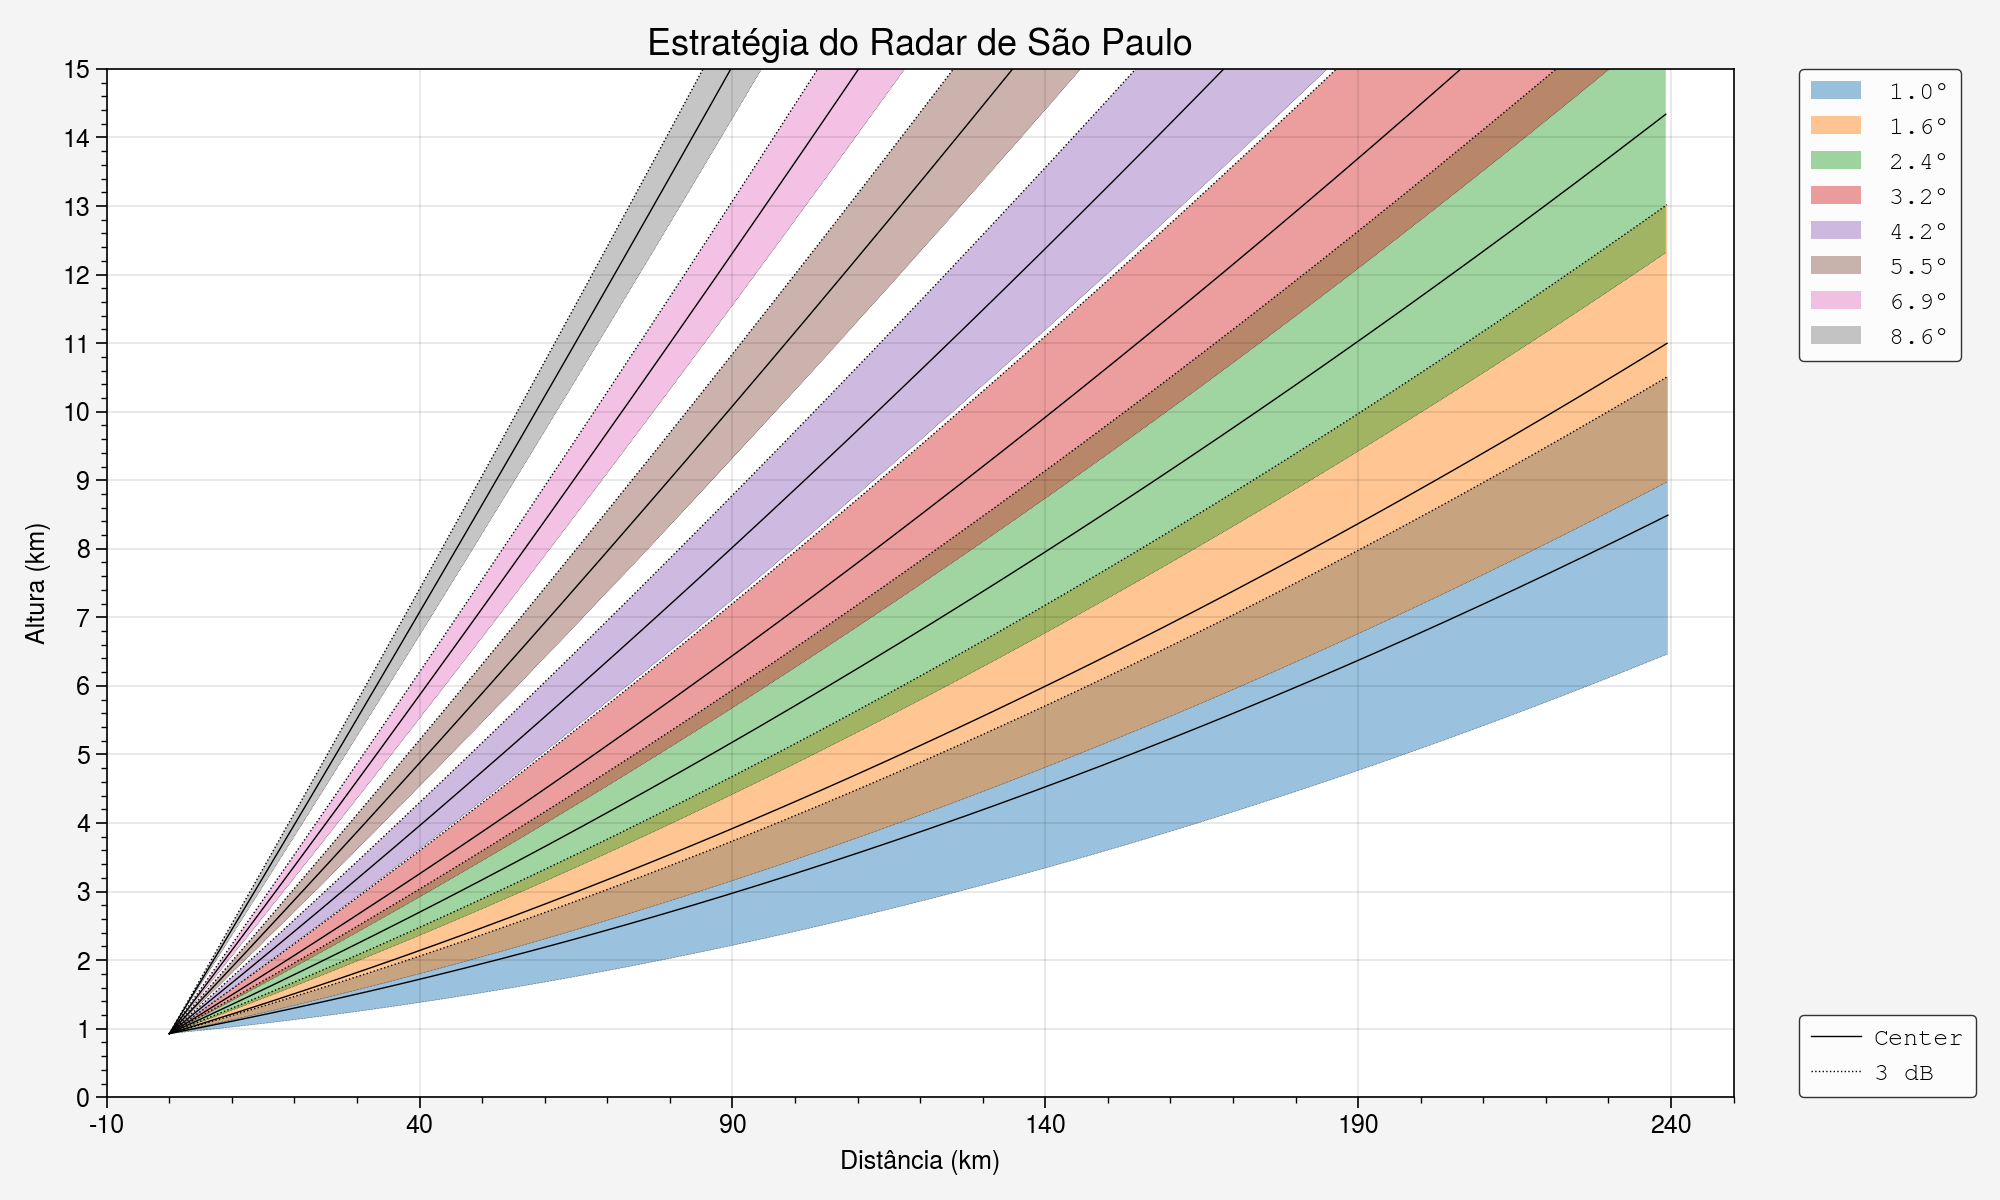

In [ ]:
# cria moldura da figura
fig, ax = plt.subplots(1,1,figsize=(10,6))

# define estilo do gráfico
plt.style.use('bmh')

# plota figura
wrl.vis.plot_scan_strategy(ranges,
                           sweeps,
                           sitecoords,
                           beamwidth=radar_beam_width,
                           vert_res = 1000.,
                           maxalt = 15000.,
                           range_res = 10000.,
                           maxrange = 250000.,
                           units='km',
                           ax=ax)

# configuração do gráfico
ax.set_title('Estratégia do Radar de São Paulo')
ax.set_xlabel('Distância (km)')
ax.set_ylabel('Altura (km)')
ax.set_xticks(ax.get_xticks()[::5])
ax.grid()

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_03_estrategia_varredura_do_radar.png', dpi=300, bbox_inches='tight')

#**AULA 04** - PLAN POSITION INDICATOR (PPI)


Antes de plotarmos o mapa de PPI, precisamos ler o nosso dado do radar. Conforme visto na aulas anteriores usaremos a função `aux_io.read_gamic`.

In [ ]:
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')
radar

In [ ]:
# verificando as variáveis existentes no arquivo do radar
variaveis_do_radar = radar.fields.keys()
variaveis_do_radar

dict_keys(['corrected_reflectivity', 'reflectivity', 'corrected_velocity', 'spectrum_width', 'corrected_differential_reflectivity', 'corrected_differential_phase', 'differential_phase', 'specific_differential_phase', 'cross_correlation_ratio'])

In [ ]:
# ângulos de elevação
sweeps =  list(radar.fixed_angle['data'])
sweeps

[1.0, 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6]

Para plotar um mapa através do Py-ART utilizaremos o objeto   [**RadarMapDisplay**](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) para plotar mapas geográficos. O dado de entrada do RadarMapDisplay é o objeto radar que obtivemos ao ler os dados do radar, o qual denominamos de `radar` [Exemplo: `radar = pyart.aux_io.read_gamic('/content/input/PNOVA2-20230218235502.HDF5)`].

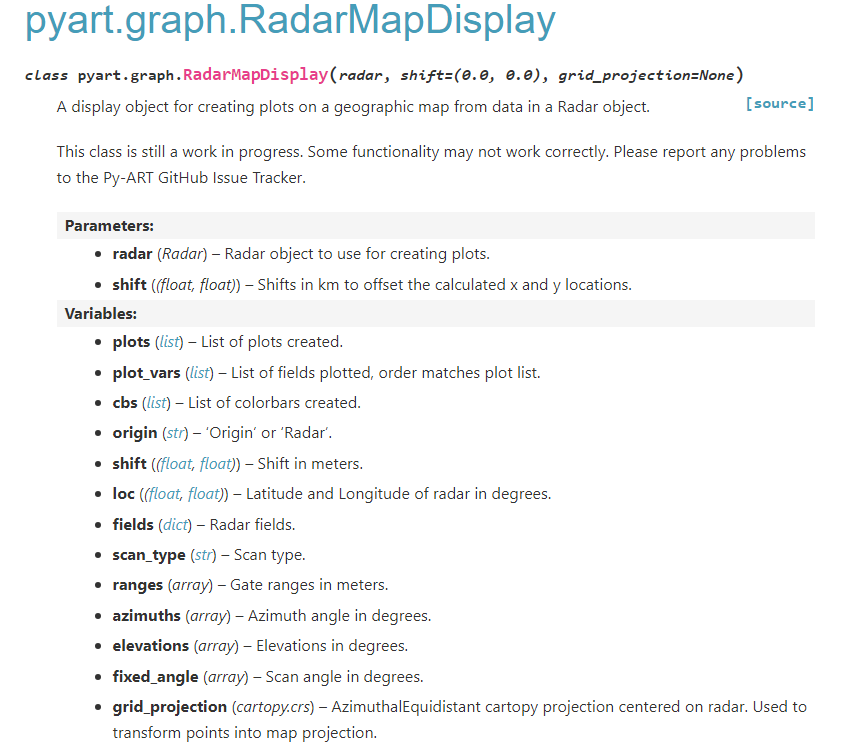

In [ ]:
# cria moldura da figura
fig = plt.figure(figsize=[10, 10])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

A partir do objeto `display` criado, precisamos indicar agora qual o tipo de gráfico que gostaríamos de criar. No nosso caso queremos plotar um mapa de Plan Position Indicatior (PPI) para uma determinada elevação, e para isto usaremos a função denominada **plot_ppi_map()**. Mas antes vamos verificar os atributos dessa função:

In [ ]:
# verificando os atributos da função
display.plot_ppi_map?

Iremos plotar o campo de refletividade. Para isso devemos inserir o nome da variável `corrected_reflectivity` na função **plot_ppi_map()**.

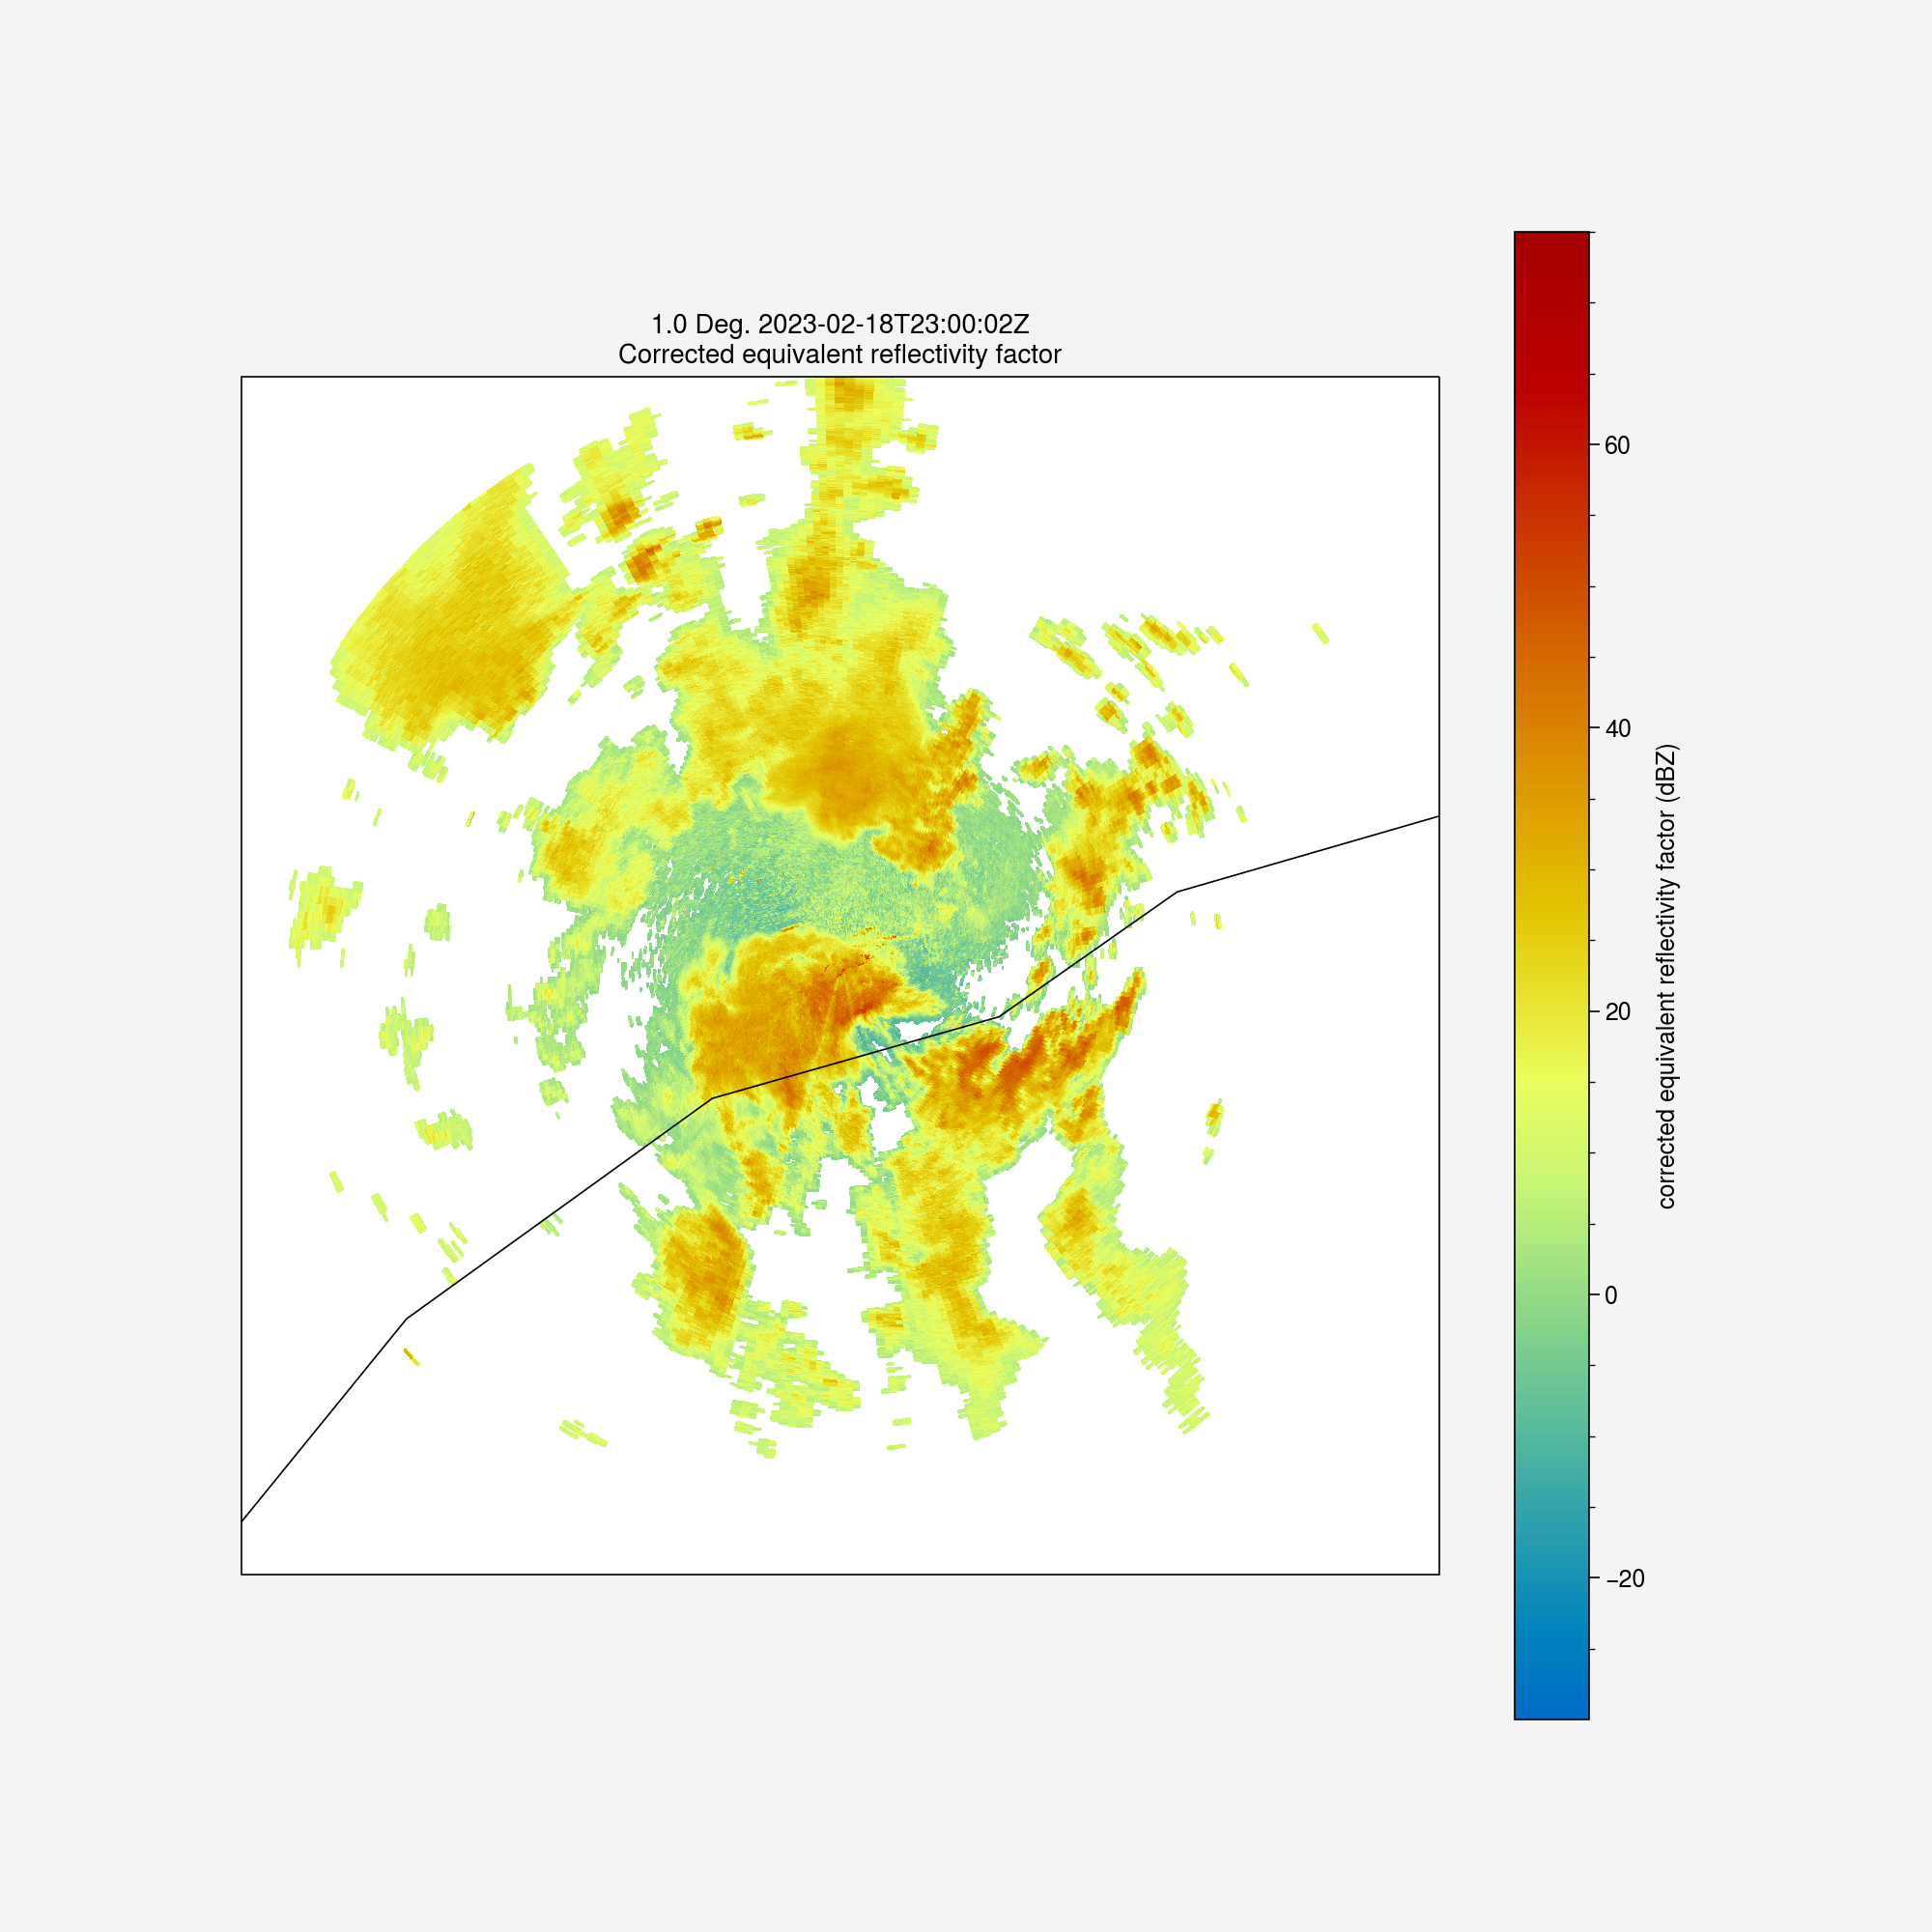

In [ ]:
# cria moldura da figura
fig = plt.figure(figsize=[10, 10])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# plota o mapa
display.plot_ppi_map('corrected_reflectivity')

- Repare que o nosso gráfico não ficou científicamente elegante. Observamos que por padrão plota-se o PPI da primeira elevação e o mapa de cores padrão do Matplotlib. Então, vamos customizar nosso gráfico. Para isto iremos adicionar os seguintes argumentos:

    1. `sweep` = **3**: Quarta elevação (Lembre-se que o índice do Python começa em 0!).
    2. `vmin` = **-20**: Mínimo valor para o campo/barra de cor de refletividade.
    3. `vmax` = **60**: Maxímo valor para o campo/barra de cor de refletividade.
    4. `projection` = **ccrs.PlateCarree()**: Sistema de coordenadas latitude/longitude do Cartopy.
    5. `cmap` = **'pyart_HomeyerRainbow'**: Paleta de cor fornecida pelo Py-ART.

In [ ]:
# lembrando que os ângulos de elevação são:
sweeps

[1.0, 1.6, 2.4, 3.2, 4.2, 5.5, 6.9, 8.6]

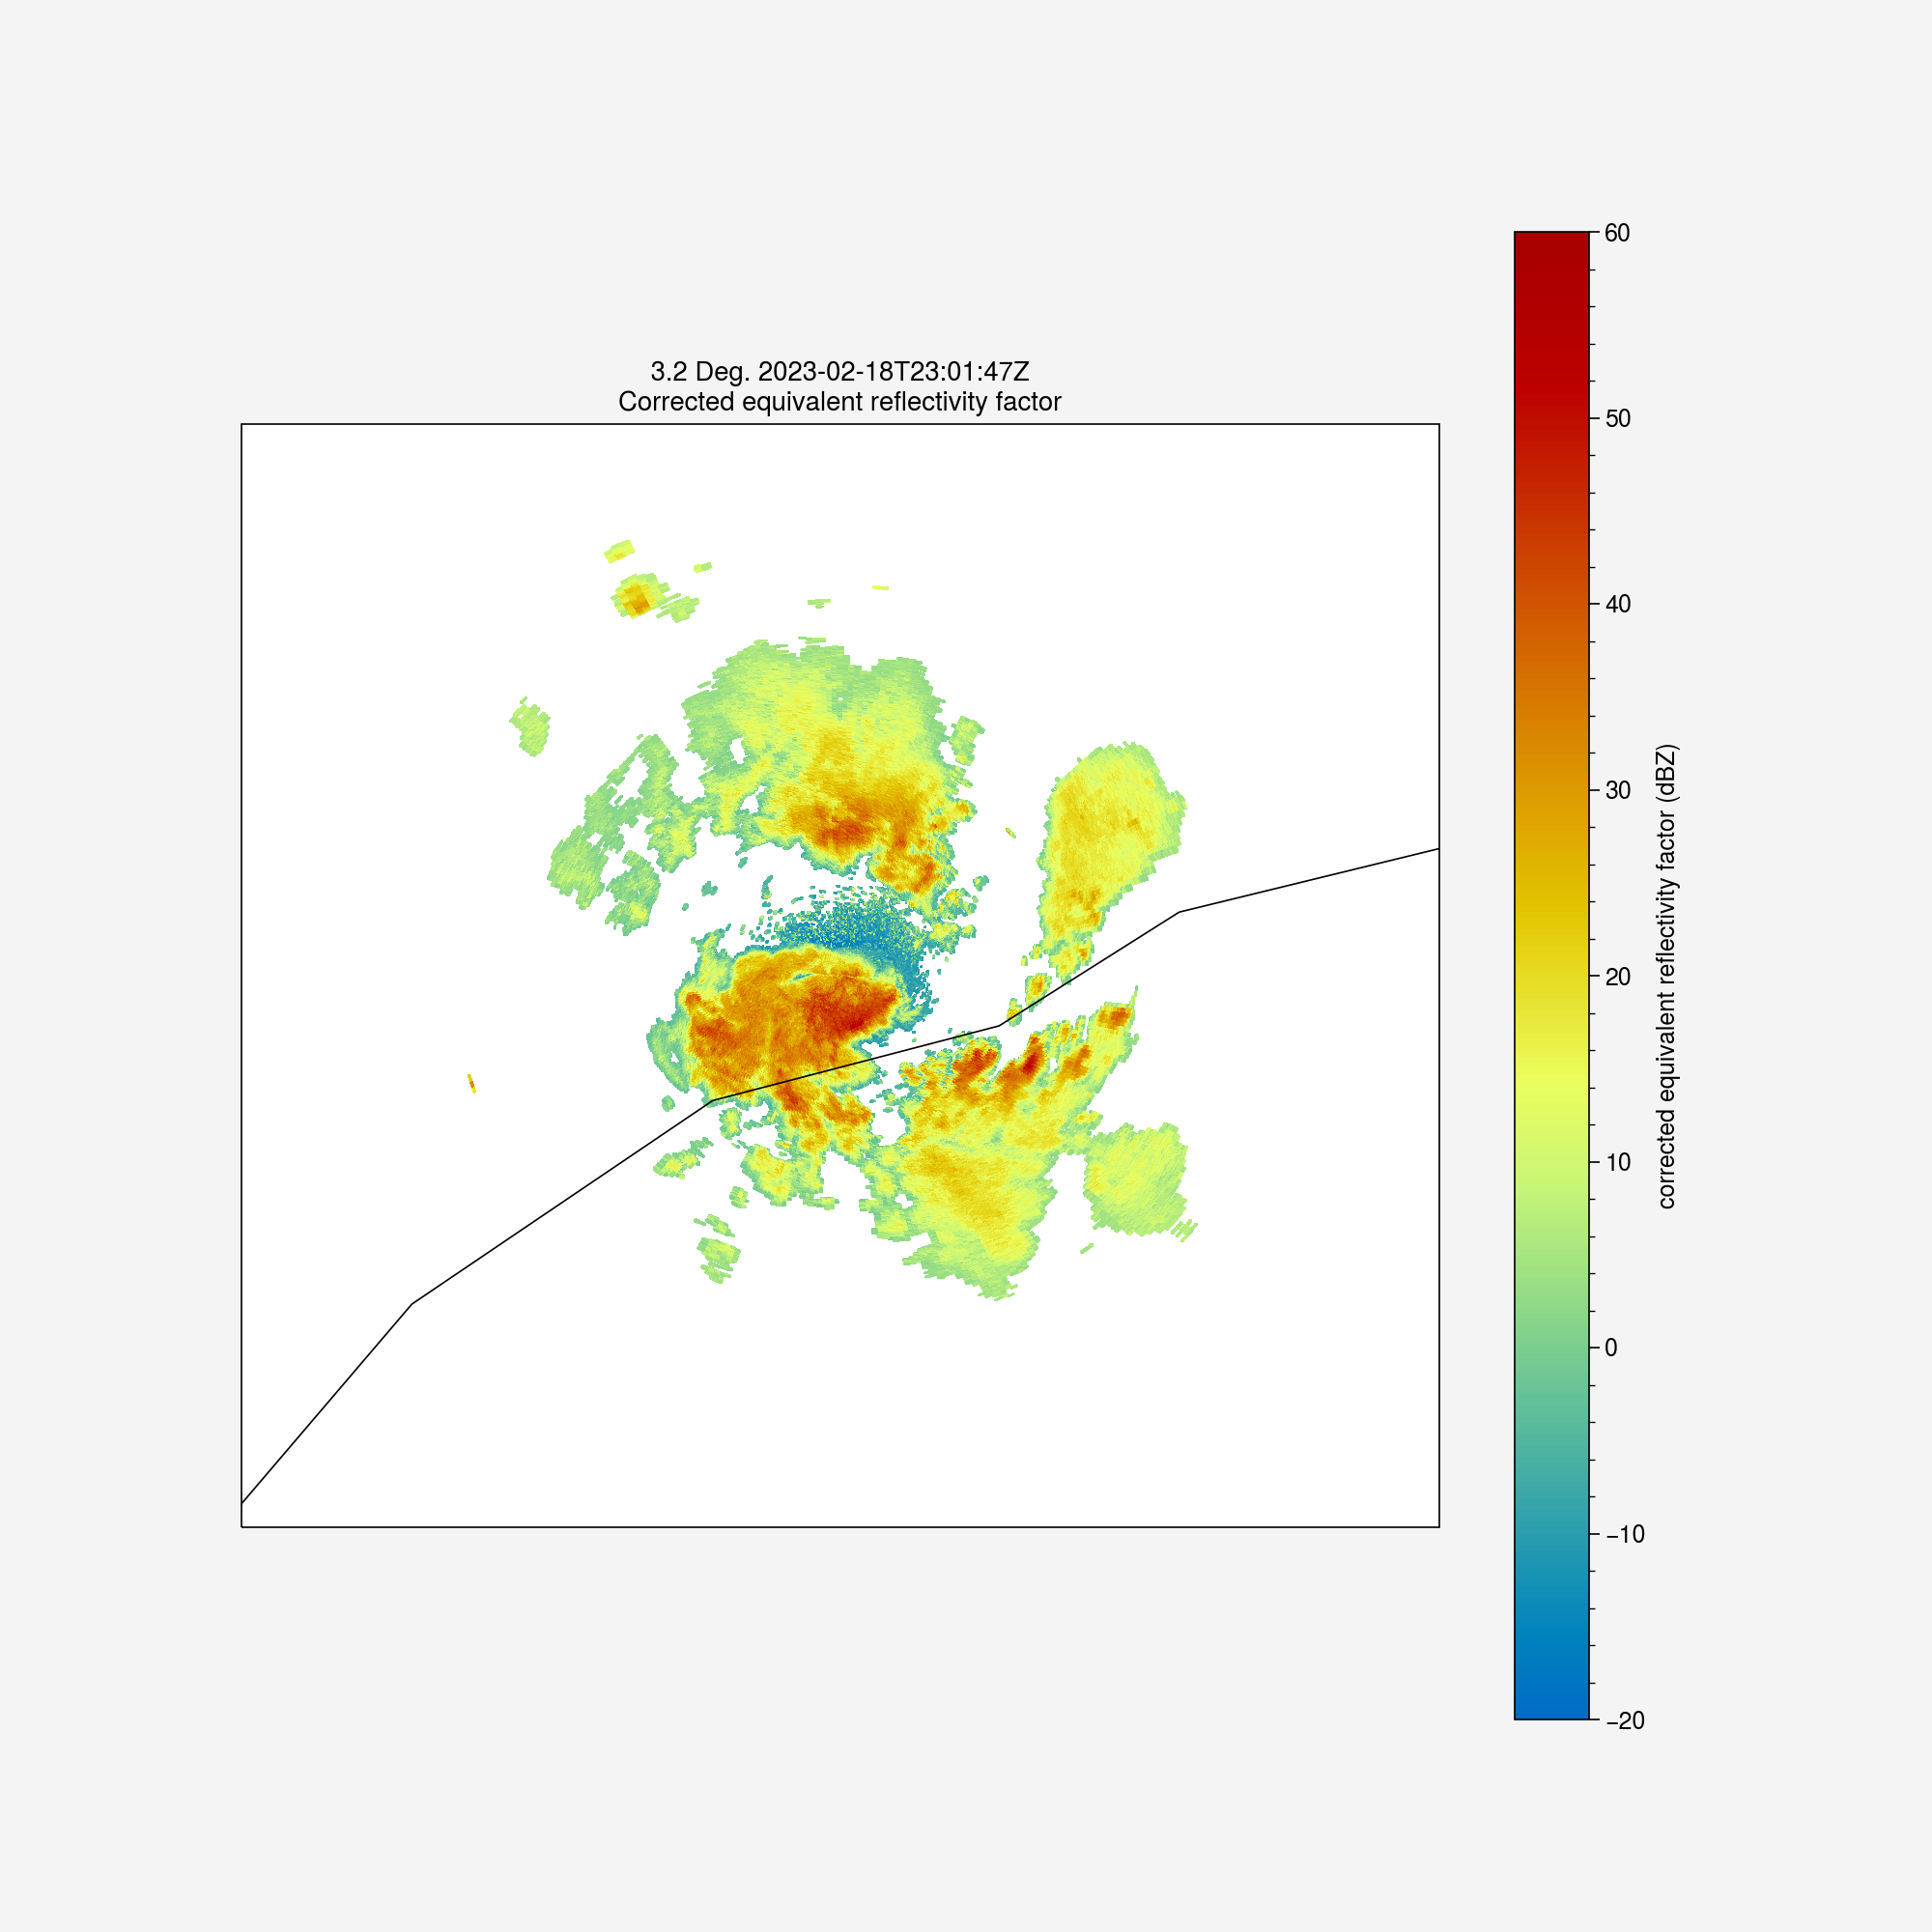

In [ ]:
# cria moldura da figura
fig = plt.figure(figsize=[10, 10])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep = 3,
                     vmin = -20,
                     vmax = 60,
                     projection = ccrs.PlateCarree(),
                     cmap = 'pyart_HomeyerRainbow')

- Existem diversas paletas de cores provenientes do Matplotlib e Py-ART, e você pode utilizar aquela que melhor se adequa ao seu objetivo. Maiores informações sobre as paletas de cores disponíveis no Py-ART acesse o [tutorial](https://arm-doe.github.io/pyart/examples/plotting/plot_choose_a_colormap.html#id1). Por exemplo, vamos testar uma paleta de cores em que os valores acima de 20 dBZ são destacados com cores quentes, através do uso da paleta de cores denominada **pyart_BuOr12**.

- Além disso podemos mudar a orientação da barra de cores de *vertical* para *horizontal*, usando o parâmetro `colobar_orient='horizontal'`. Mais informações sobre os parâmetros usados na barra de cores, acessar [aqui](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.RadarMapDisplay.plot_colorbar.html).

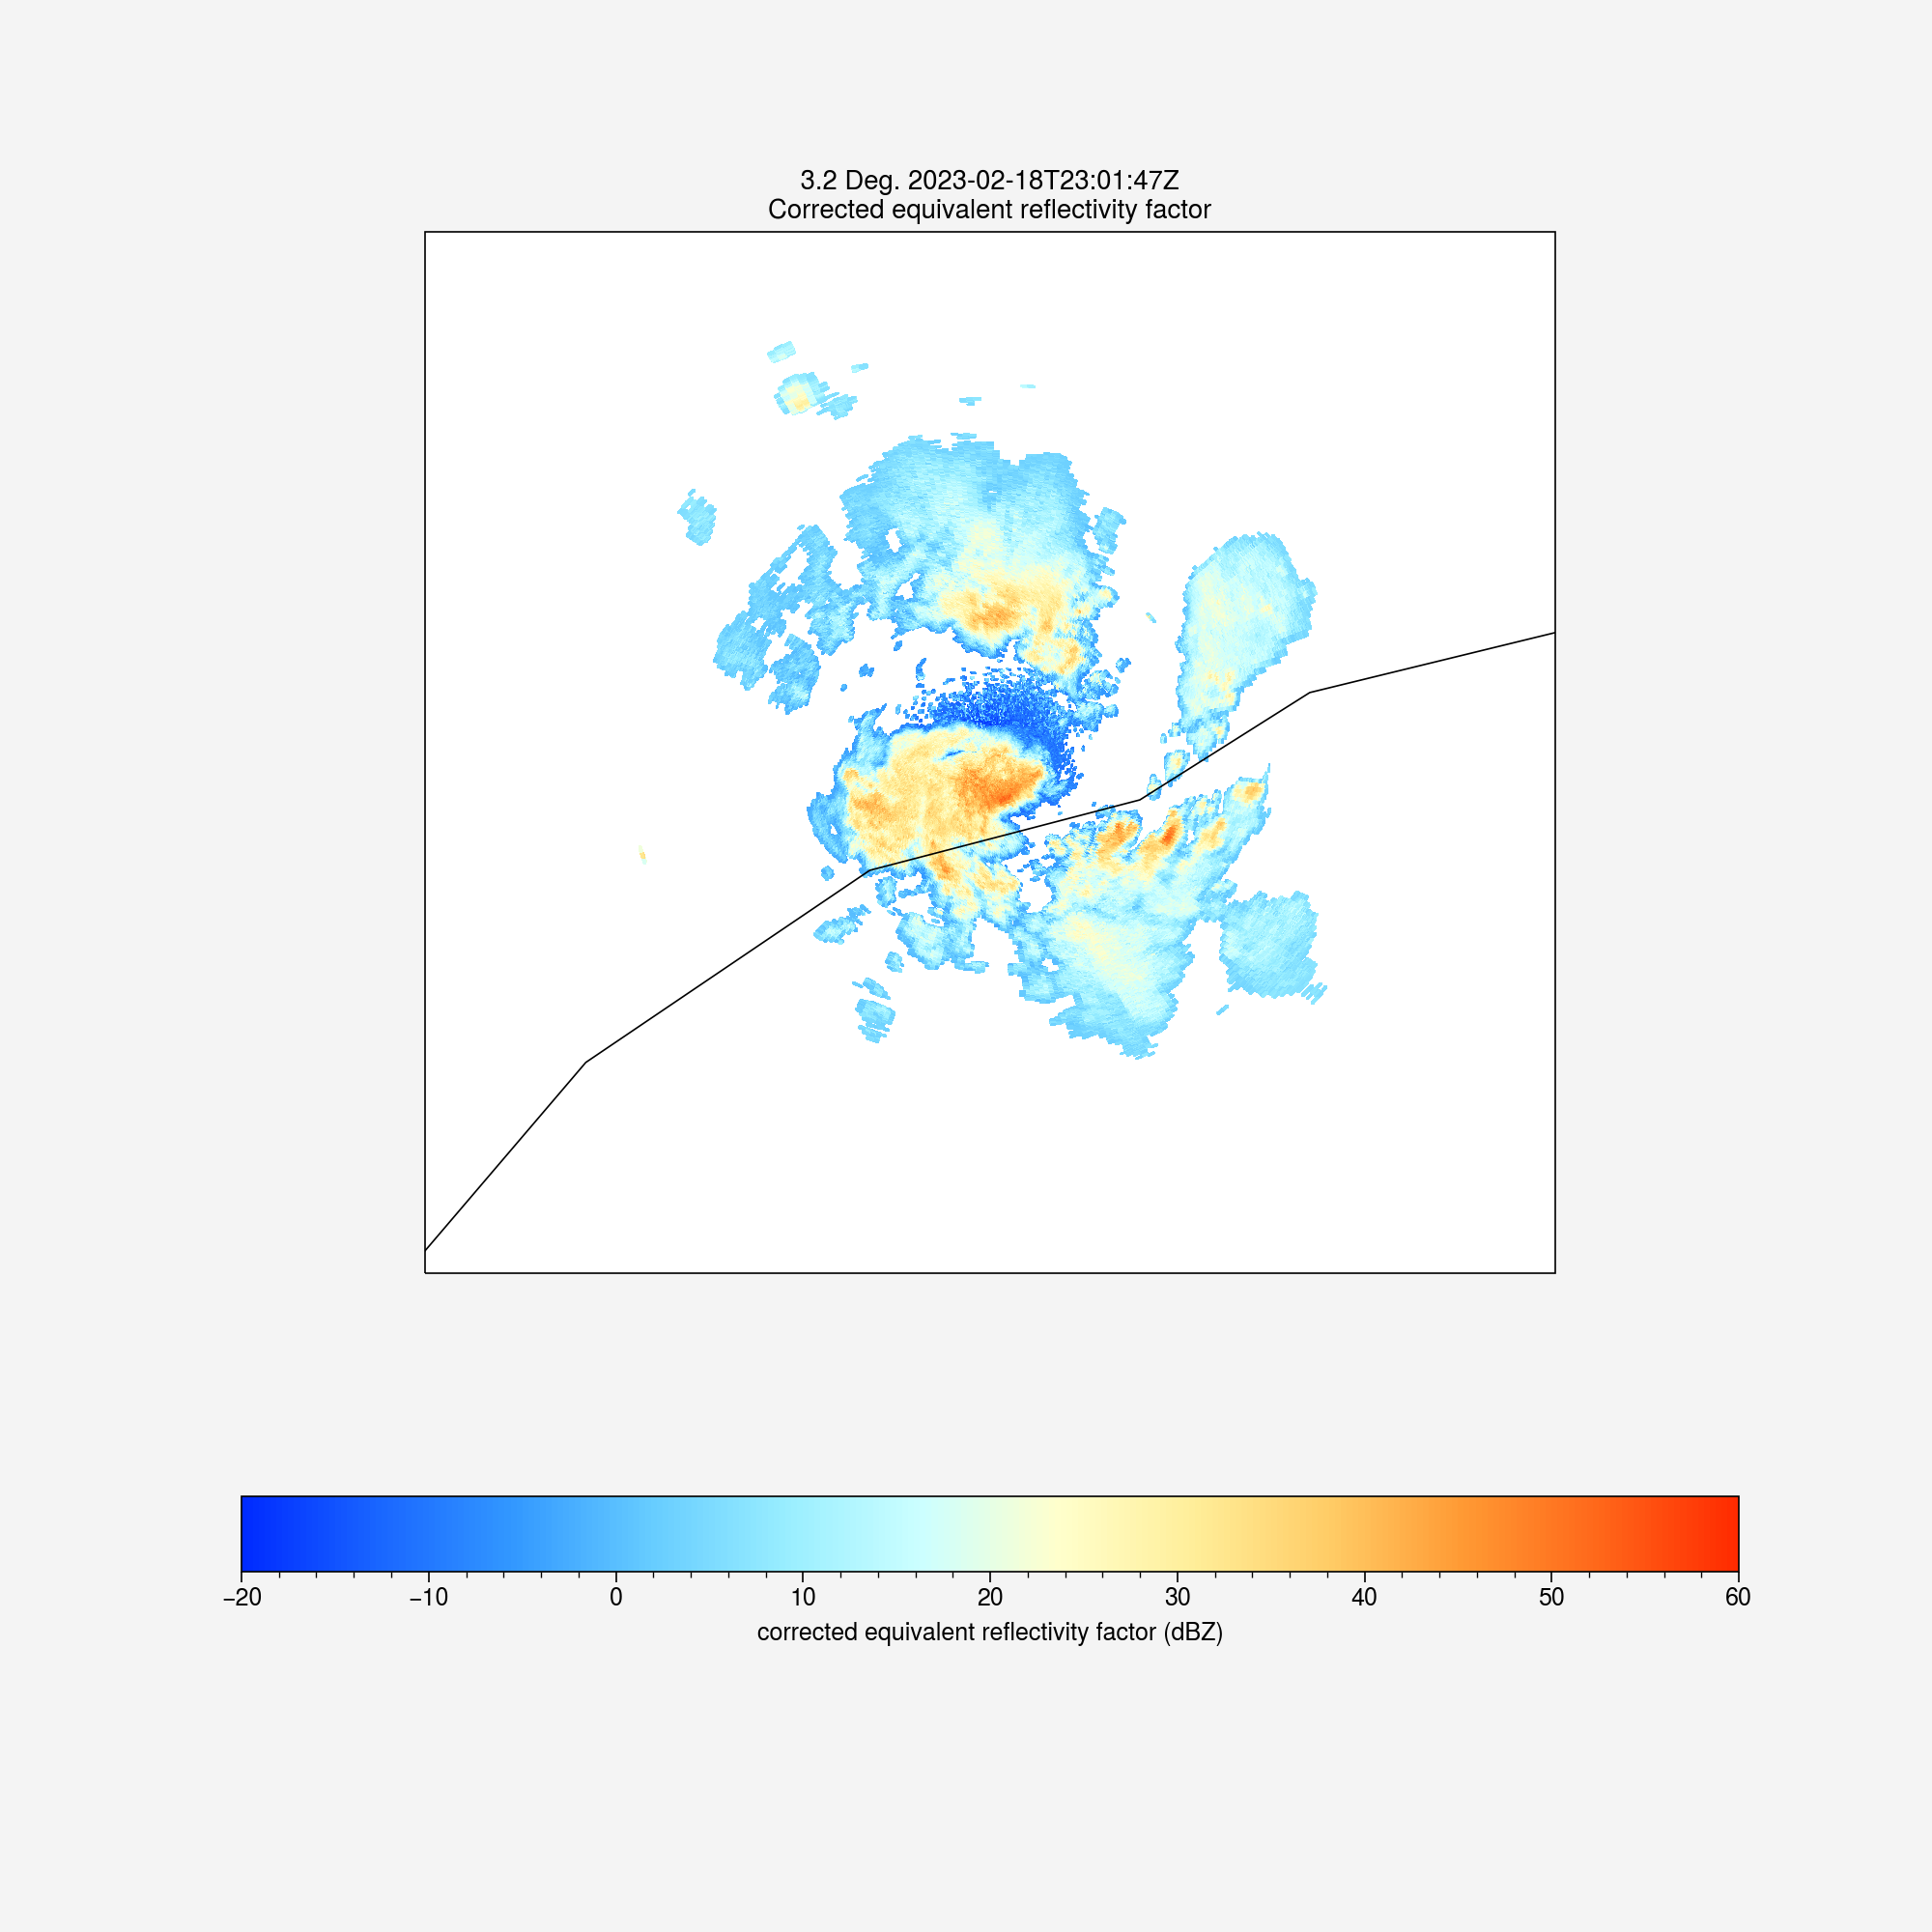

In [ ]:
# cria moldura da figura
fig = plt.figure(figsize=[10, 10])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep=3,
                     vmin=-20,
                     vmax=60,
                     projection=ccrs.PlateCarree(),
                     cmap='pyart_BuOr12',
                     colorbar_orient='horizontal')

Agora vamos deixar o nosso gráfico o mais customizado possível.

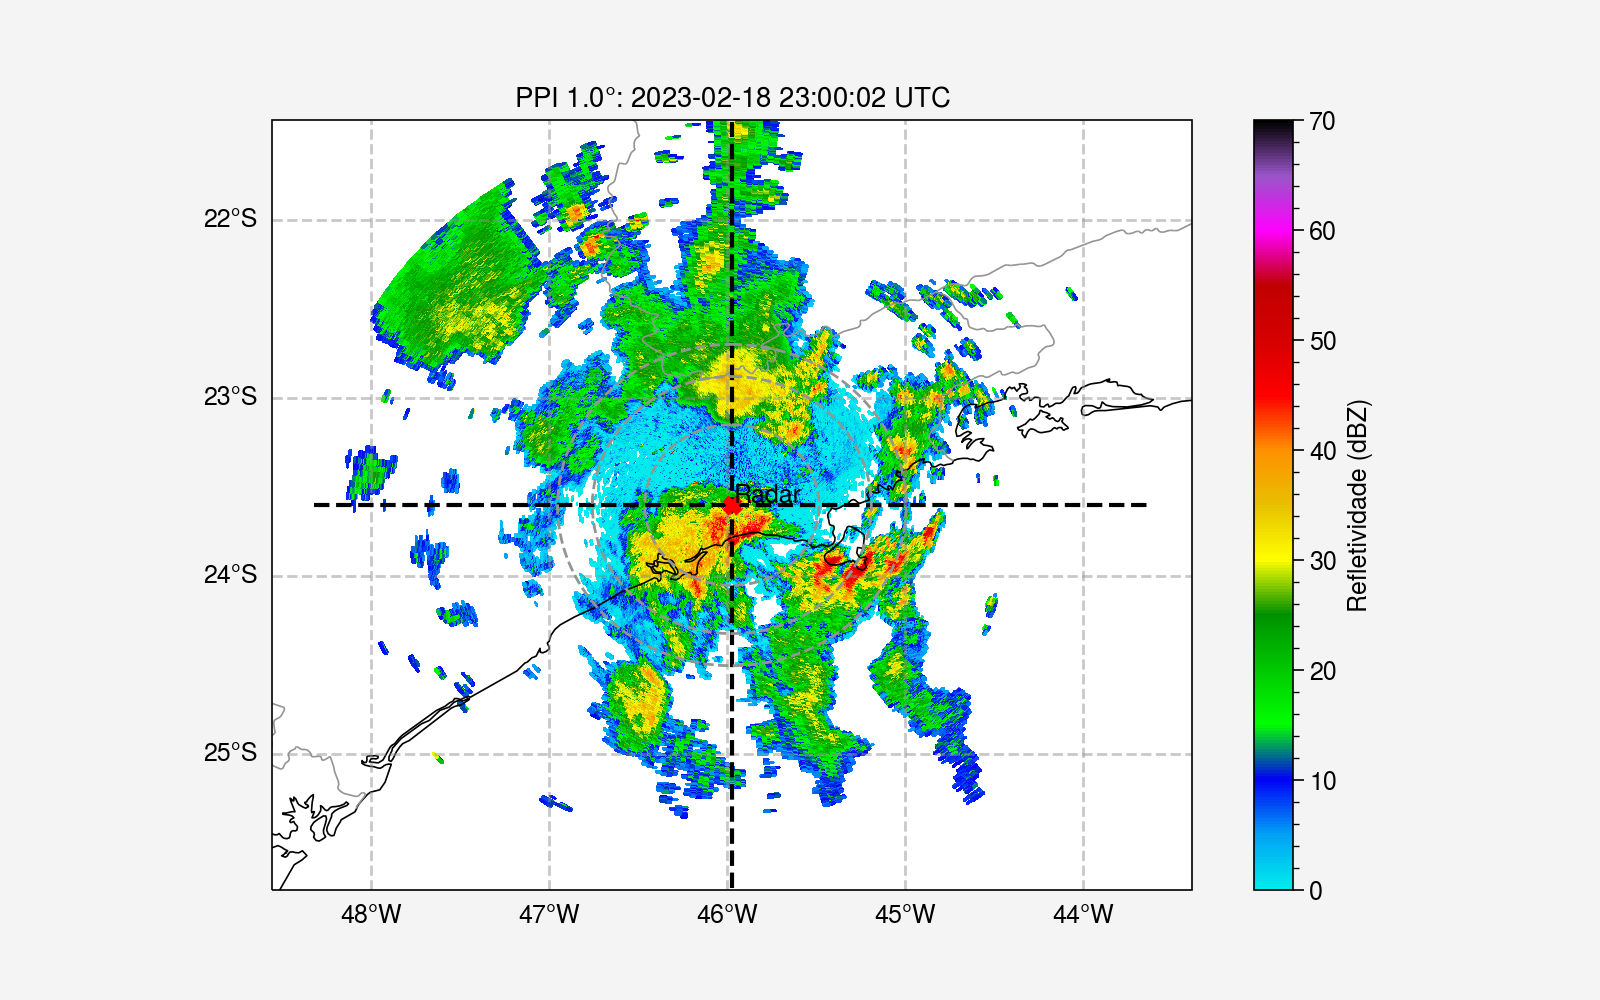

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 0 #(=primeira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# definindo a projeção do mapa
projection = ccrs.PlateCarree(central_longitude=lon_radar)

# cria moldura da figura
fig = plt.figure(figsize=[8,5])

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep=level,
                     vmin=0,
                     vmax=70,
                     fig=fig,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     projection=projection,
                     resolution='10m',
                     cmap='pyart_NWSRef',
                     colorbar_label='Refletividade (dBZ)',
                     colorbar_orient='vertical',
                     title=f'PPI {str_level}$\degree$: {data} UTC')

# plota as linhas transversais que passam pelo centro do radar
display.plot_line_geo(np.array([lon_radar, lon_radar]), np.array([latmin, latmax]), linestyle='--', color='black')
display.plot_line_geo(np.array([lonmin, lonmax]), np.array([lat_radar, lat_radar]), linestyle='--', color='black')

# plota aneis de distância
display.plot_range_rings([50, 80, 100], ls='--', lw=1, col='gray')

# indica a localização do radar com um ponto
display.plot_point(lon_radar, lat_radar, symbol='X', label_text='Radar', color='red')

# plota as linhas de latitudes e longitudes
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

"""
# para deixar as coordenadas dentro do plot, basta descomentar o bloco a seguir
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xpadding = -5; gl.ypadding = -5
gl.ylabel_style = {'color': 'black', 'size': 6, 'weight': 'bold'}
gl.xlabel_style = {'color': 'black', 'size': 6, 'weight': 'bold'}
"""

# salva figura
plt.savefig(f'{dir}output/AULA_04a_ppi_{str_level}graus_{data}.png', bbox_inches='tight', dpi=300)

Ao analisar a área total do radar não temos o detalhamento de uma tempestade em específico. Para isso, precisaremos delimitar a latitude e longitude da região de interesse através do atributo `min_lon, max_lon, min_lat e max_lat` no objeto **plot_ppi_map()**.

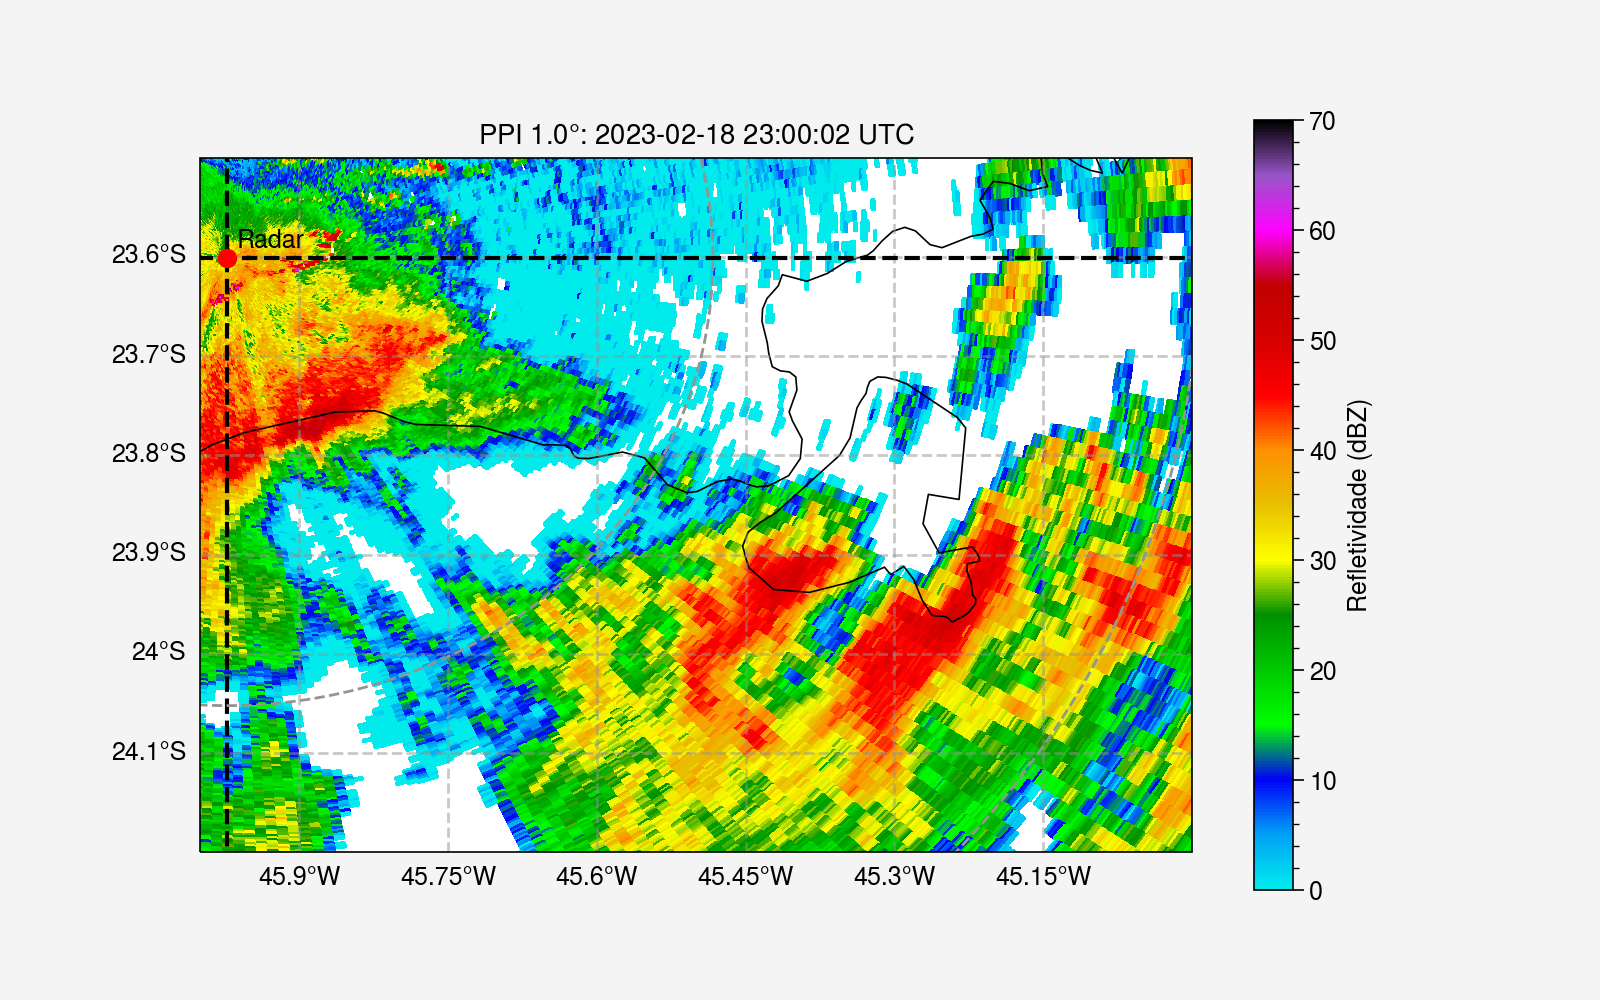

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 0 #(=primeira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# definindo a projeção do mapa
projection = ccrs.PlateCarree(central_longitude=lon_radar)

# cria moldura da figura
fig = plt.figure(figsize=[8,5])

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep=level,
                     vmin=0,
                     vmax=70,
                     fig=fig,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     projection=projection,
                     resolution='10m',
                     cmap='pyart_NWSRef',
                     colorbar_label='Refletividade (dBZ)',
                     min_lon=-46,
                     max_lon=-45,
                     min_lat=-24.2,
                     max_lat=-23.5,
                     title=f'PPI {str_level}$\degree$: {data} UTC')

# plota as linhas transversais que passam pelo centro do radar
display.plot_line_geo(np.array([lon_radar, lon_radar]), np.array([latmin, latmax]), linestyle='--', color='black')
display.plot_line_geo(np.array([lonmin, lonmax]), np.array([lat_radar, lat_radar]), linestyle='--', color='black')

# plota aneis de distância
display.plot_range_rings([50, 100, 150, 200, 250], ls='--', lw=1, col='gray')

# indica a localização do radar com um ponto
display.plot_point(lon_radar, lat_radar, symbol='o', label_text='Radar', color='red')

# plota as linhas de latitudes e longitudes
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# salva figura
plt.savefig(f'{dir}output/AULA_04b_ppi_{str_level}graus_{data}.png',
            bbox_inches='tight',
            dpi=300)

É muito comum querermos delimitar apenas regiões com valores de refletividade acima de um determinado valor. Para isso, podemos delimitar o valor mínimo (`vmin`) e máximo (`vmax`) e mascarar os valores que estão fora desse range de valores utilizando o atributo `mask_outside` com o valor **True**. Por exemplo, gostaríamos de analisar apenas ecos de radar com valores acima de 40 dBZ.

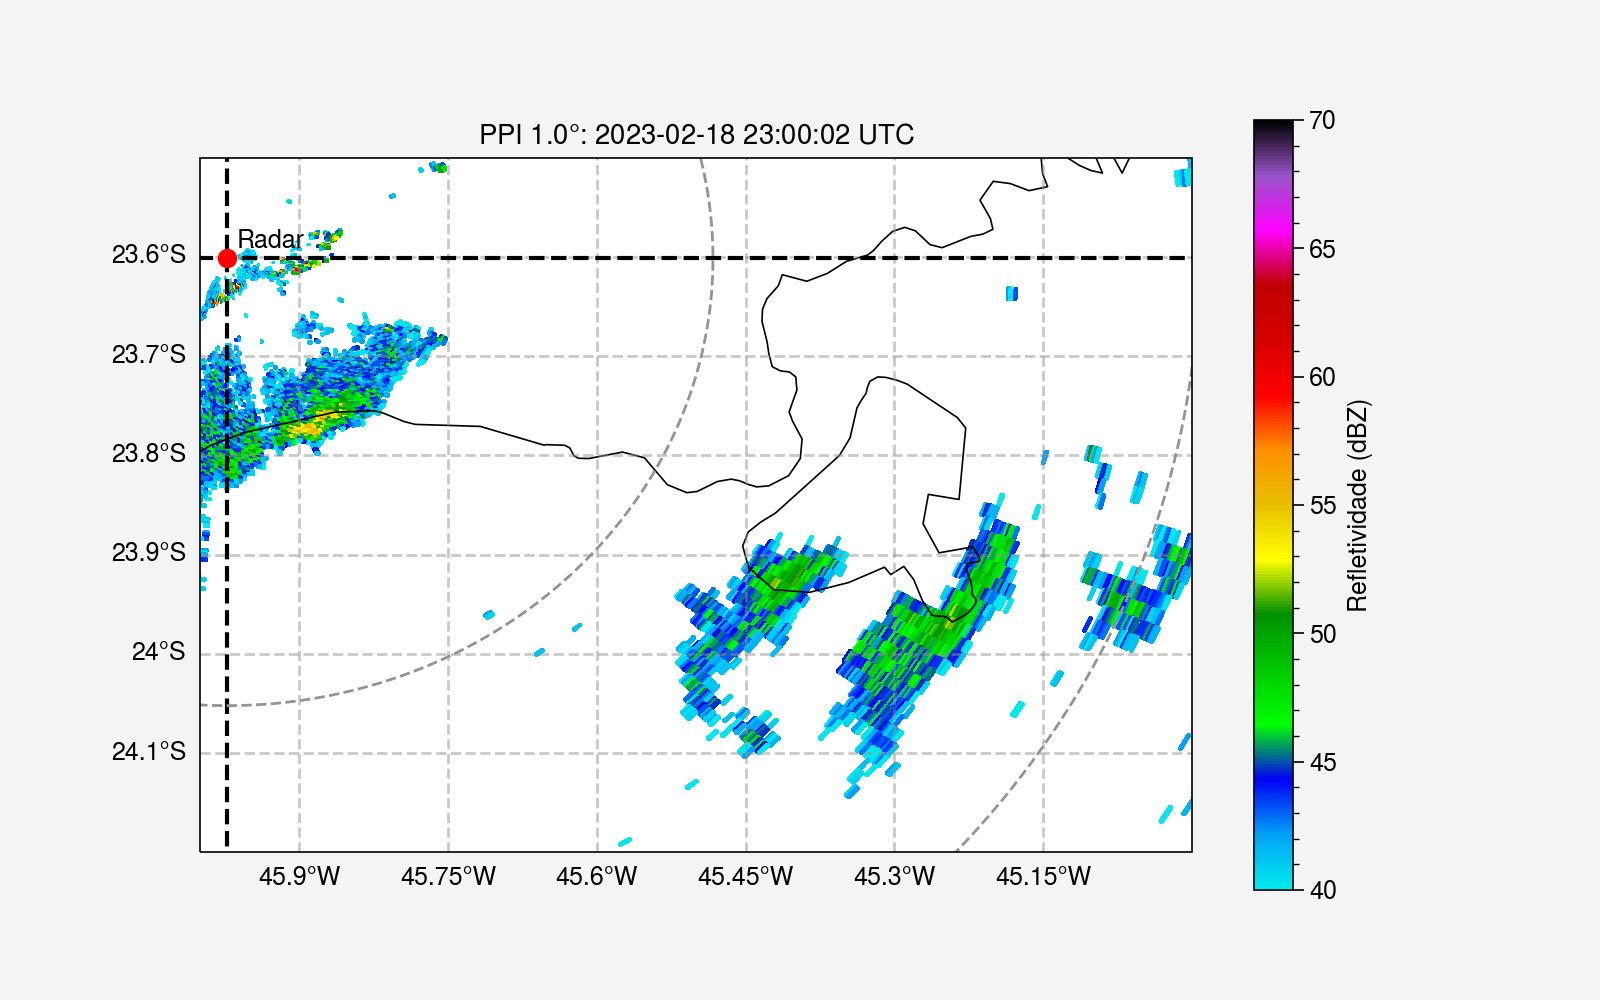

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 0 #(=primeira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# definindo a projeção do mapa
projection = ccrs.PlateCarree(central_longitude=lon_radar)

# cria moldura da figura
fig = plt.figure(figsize=[8,5])

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep=level,
                     vmin=40,
                     vmax=70,
                     fig=fig,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     projection=projection,
                     resolution='10m',
                     cmap='pyart_NWSRef',
                     colorbar_label='Refletividade (dBZ)',
                     min_lon=-46,
                     max_lon=-45,
                     min_lat=-24.2,
                     max_lat=-23.5,
                     mask_outside=True,
                     title=f'PPI {str_level}$\degree$: {data} UTC')

# plota as linhas transversais que passam pelo centro do radar
display.plot_line_geo(np.array([lon_radar, lon_radar]), np.array([latmin, latmax]), linestyle='--', color='black')
display.plot_line_geo(np.array([lonmin, lonmax]), np.array([lat_radar, lat_radar]), linestyle='--', color='black')

# plota aneis de distância
display.plot_range_rings([50, 100, 150, 200, 250], ls='--', lw=1, col='gray')

# indica a localização do radar com um ponto
display.plot_point(lon_radar, lat_radar, symbol='o', label_text='Radar', color='red')

# plota as linhas de latitudes e longitudes
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# salva figura
plt.savefig(f'{dir}output/AULA_04c_ppi_{str_level}graus_{data}.png',
            bbox_inches='tight',
            dpi=300)

#**AULA 05** - CONSTANT ALTITUDE PLAN POSITION INDICATOR (CAPPI)

Para gerar o CAPPI usaremos os dados de todos PPI. Para isto usaremos uma função do Py-ART que transforma de PPI para CAPPI, conhecida como [map.grid_from_radars](https://arm-doe.github.io/pyart/API/generated/pyart.map.grid_from_radars.html). Vejam também a função [map.map_to_grid](https://arm-doe.github.io/pyart/API/generated/pyart.map.map_to_grid.html).

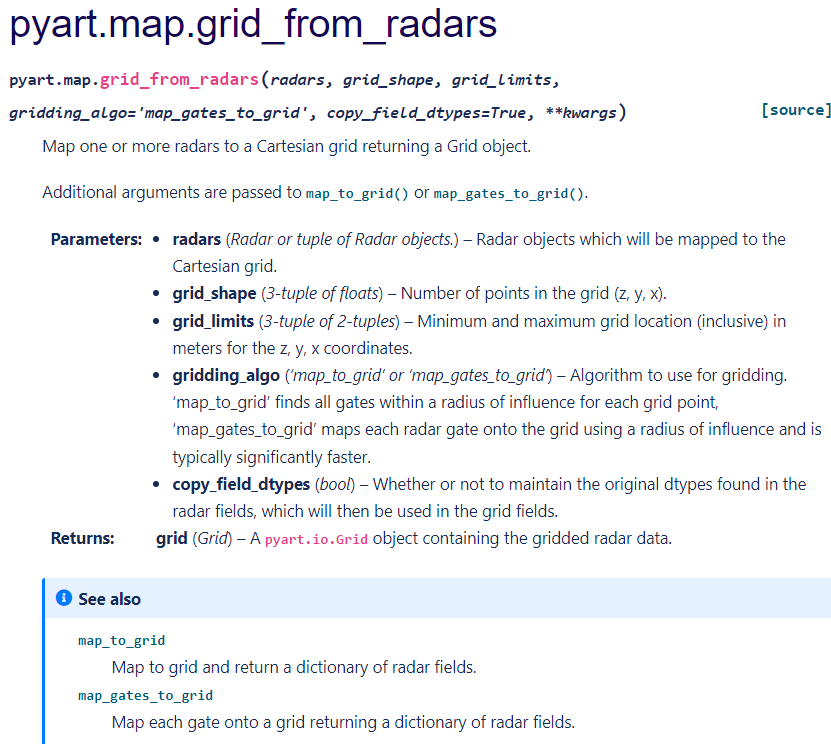

O Py-ART tem o objeto `grid` que possui características similares ao objeto `Radar`, exceto que os dados são alocados em **Cordenadas Cartesianas** ao invés de **Coordenadas da Antena do Radar**. Vamos acessar os parâmetros de entrada da função `Grid`.

In [ ]:
pyart.core.Grid?

In [ ]:
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude, e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

# gera CAPPI
cappi = pyart.map.grid_from_radars(radar,
                                   grid_shape=(13, 500, 500),
                                   grid_limits=((3000.0 - altitude, 15000.0 - altitude),
                                                (-250000., 250000.),
                                                (-250000., 250000.)),
                                   grid_origin=(lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam',
                                   min_radius=1750.0,
                                   weighting_function='Nearest',
                                   fields=['corrected_reflectivity'])

In [ ]:
# mostra os campos disponiveis
cappi.fields.keys()

dict_keys(['corrected_reflectivity', 'ROI'])

In [ ]:
# mostra o formato da variável "cappi"
cappi.fields['corrected_reflectivity']['data'].shape

(13, 500, 500)

In [ ]:
# mostra as informações sobre a refletividade
cappi.fields['corrected_reflectivity']

{'data': masked_array(
   data=[[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         ...,
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --,

In [ ]:
# mostrando os dados do CAPPI de TODAS alturas
cappi.fields['corrected_reflectivity']['data']

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

- Gostaríamos de plotar de maneira simples o CAPPI de 3 km de altura da refletividade corrigida. Para plotarmos o mapa de CAPPI de uma determinada altura, criaremos um objeto do Py-ART denominado [GridMapDisplay](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.GridMapDisplay.html). A partir desse objeto criado utilizaremos a função [plot_grid](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.graph.GridMapDisplay.plot_grid.html#pyart.graph.GridMapDisplay.plot_grid) para plotar o mapa de CAPPI. Mas antes vamos verificar os argumentos da função **graph.GridMapDisplay.plot_grid**.

In [ ]:
# conferindo os argumentos e saídas da função
pyart.graph.GridMapDisplay.plot_grid?

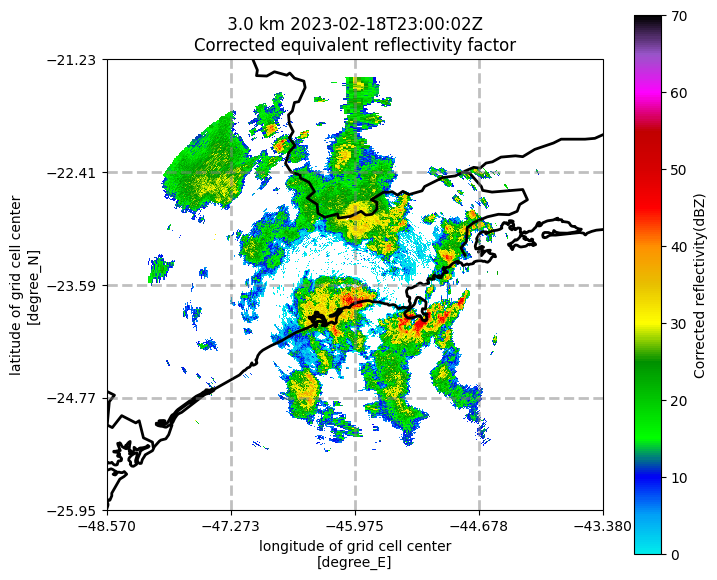

In [ ]:
# define o tamanho da figura
fig = plt.figure(figsize=(8, 7))

# define os eixos e projeção da figura
ax1 = plt.subplot(111, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# corrige o nível do cappi levando em conta a altitude do radar
# para mostrar corretamente no título da figura
display.grid.z['data'] = display.grid.z['data'] + altitude

# plota o cappi
display.plot_grid("corrected_reflectivity",
                  level=0,
                  vmin=0,
                  vmax=70,
                  ax=ax1,
                  cmap='pyart_NWSRef')

Plotando o CAPPI de maneira mais completa

CPU times: user 9.75 s, sys: 419 ms, total: 10.2 s
Wall time: 9.86 s


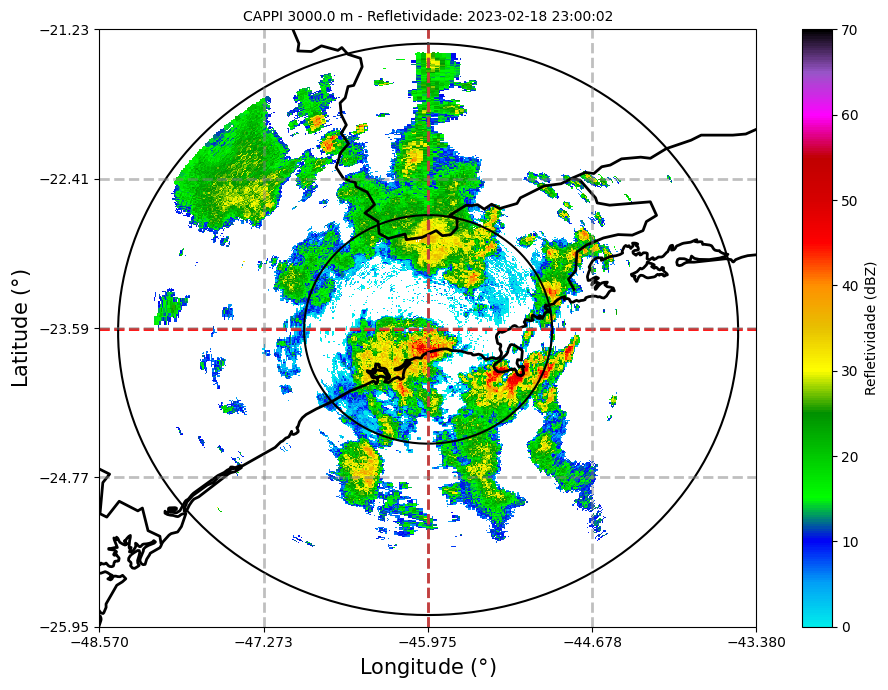

In [ ]:
# contador de tempo
%%time
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude, longitude do radar e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                             GERA O CAPPI
#========================================================================================================================#
# gera CAPPI
cappi = pyart.map.grid_from_radars(radar,
                                   grid_shape=(13, 500, 500),
                                   grid_limits=((3000. - altitude, 15000. - altitude),
                                                (-250000., 250000.),
                                                (-250000., 250000.)),
                                   grid_origin=(lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam',
                                   min_radius=1750.0,
                                   weighting_function='Nearest',
                                   fields=['corrected_reflectivity'])

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig = plt.figure(figsize=(10,7))

# define os eixos e projeção da figura
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# plota o cappi
display.plot_grid("corrected_reflectivity",
                  level=0,
                  vmin=0,
                  vmax=70,
                  ax=ax,
                  cmap='pyart_NWSRef',
                  colorbar_label='Refletividade (dBZ)')

# plotas as linhas passando pelo radar
display.plot_crosshairs(lon=lon_radar, lat=lat_radar)

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([100, 250], lon_radar, lat_radar, 'black', label='Radar: 45 km')

# título da figura
plt.title(f'CAPPI {int(display.grid.z["data"][0]) + altitude} m - Refletividade: {data}', fontsize=10)

# nome dos eixos x e y
ax.set_xlabel('Longitude ($\degree$)', fontsize=15)
ax.set_ylabel('Latitude ($\degree$)', fontsize=15)

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_05_cappi_{data}.png', dpi=300)

#**AULA 06** - SEÇÃO TRANSVERSAL VERTICAL ATRAVÉS DO CAPPI

Este script plota uma seção transversal ao longo de uma linha que conecta dois pontos no espaço. Teremos que informar a latitude e longitude do ponto 1 e ponto 2.

In [ ]:
# mostrandos os atributos da função "retrieve.conv_strat_yuter"
pyart.graph.GridMapDisplay.plot_cross_section?

CPU times: user 9.98 s, sys: 370 ms, total: 10.4 s
Wall time: 10 s


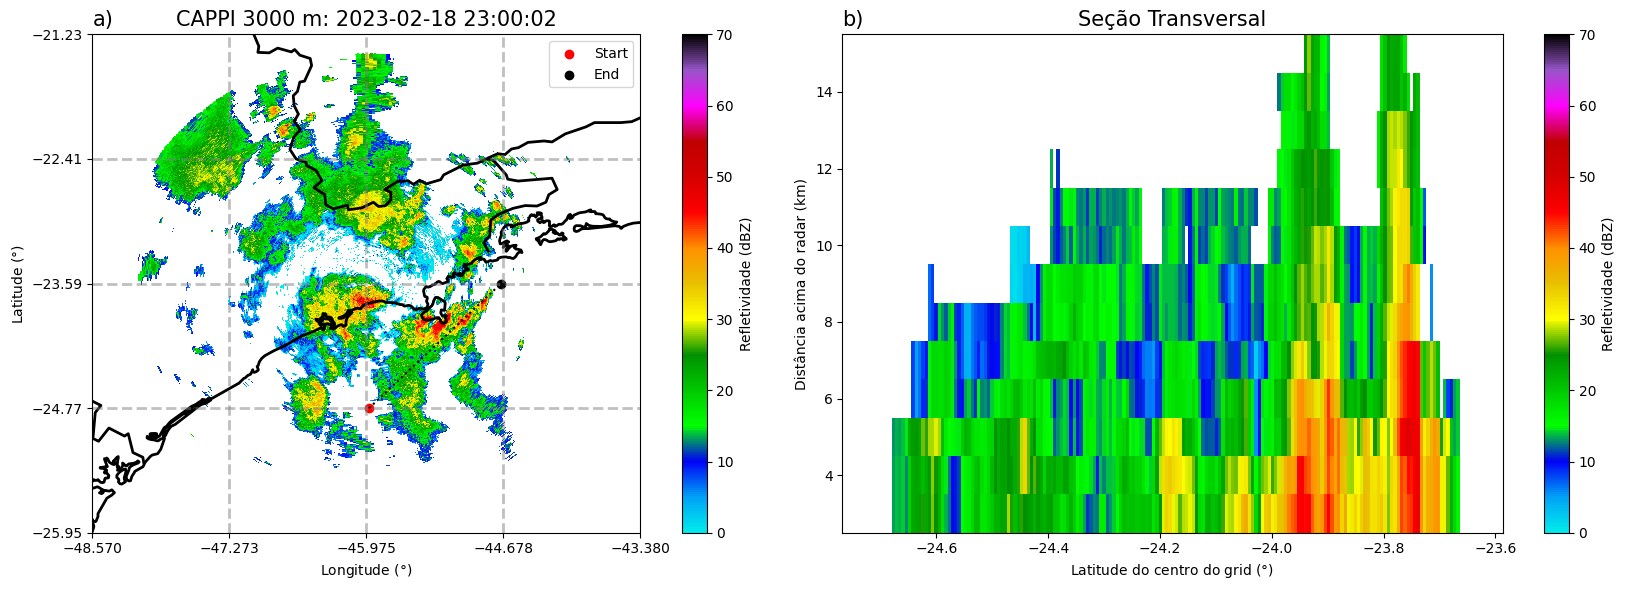

In [ ]:
%%time
#========================================================================================================================#
#                                                LEITURA DADO DO RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude, longitude e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                             GERA O CAPPI
#========================================================================================================================#
# gera CAPPI
cappi = pyart.map.grid_from_radars(radar,
                                   grid_shape=(13, 500, 500),
                                   grid_limits=((3000. - altitude, 15000. - altitude),
                                                (-250000., 250000.),
                                                (-250000., 250000.)),
                                   grid_origin=(lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam',
                                   min_radius=1750.0,
                                   weighting_function='Nearest',
                                   fields=['corrected_reflectivity'])

#========================================================================================================================#
#                                             DEFINE LOCAL DO CORTE VERTICAL
#========================================================================================================================#
# define o ponto inicial e final, usando (latitude, longitude)
start = (-24.77, -45.95)
end = (-23.59, -44.7)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig = plt.figure(figsize=(18, 6))

#==========================#
#     FIGURA 1: CAPPI
#==========================#
# moldura da figura
ax1 = plt.subplot(121, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# corrige o nível do cappi levando em conta a altitude do radar
# para mostrar corretamente no título da figura
display.grid.z['data'] = display.grid.z['data'] + altitude

# plota o cappi
display.plot_grid("corrected_reflectivity",
                  level=0,
                  vmin=0,
                  vmax=70,
                  ax=ax1,
                  cmap='pyart_NWSRef',
                  colorbar_label='Refletividade (dBZ)')

# plota o ponto inicial e final e a linha que conecta eles
ax1.scatter(start[1], start[0], color='red', label='Start')
ax1.scatter(end[1], end[0], color='black', label='End')
ax1.plot([start[1], end[1]], [start[0], end[0]], color="k", linestyle=":")
plt.legend(loc="upper right")

# plota as linhas de latitude e longitudes
ax1 = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# nome dos eixos x e y
plt.xlabel('Longitude ($\degree$)')
plt.ylabel('Latitude ($\degree$)')

# título da figura
plt.title(f'CAPPI {int(display.grid.z["data"][0])} m: {data}', fontsize=15)
plt.title('a)', loc='left', fontsize=15)

#==========================#
#     FIGURA 2: Corte
#==========================#
# moldura da figura
# adiciona a seção transversal e seta o Eixo-X com a latitude (lat)
ax2 = plt.subplot(122)

# faz o plot
display.plot_cross_section("corrected_reflectivity",
                           start,
                           end,
                           x_axis="lat",
                           cmap='pyart_NWSRef',
                           vmin=0,
                           vmax=70,
                           steps=200,
                           colorbar_label='Refletividade (dBZ)')

# nome dos eixos x e y
plt.xlabel('Latitude do centro do grid ($\degree$)')
plt.ylabel('Distância acima do radar (km)')

# título da figura
plt.title('Seção Transversal', fontsize=15)
plt.title('b)', loc='left', fontsize=15)

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_06_vcut_{data}.png', dpi=300)

#**AULA 07** - VARIÁVEIS POLARIMÉTRICAS

Para plotarmos as demais variáveis do radar, basta mudarmos o nome da variável em `.plot_ppi_map`. Por exemplo, iremos plotar o PPI da variável `Refletividade Diferencial Corrigida`.

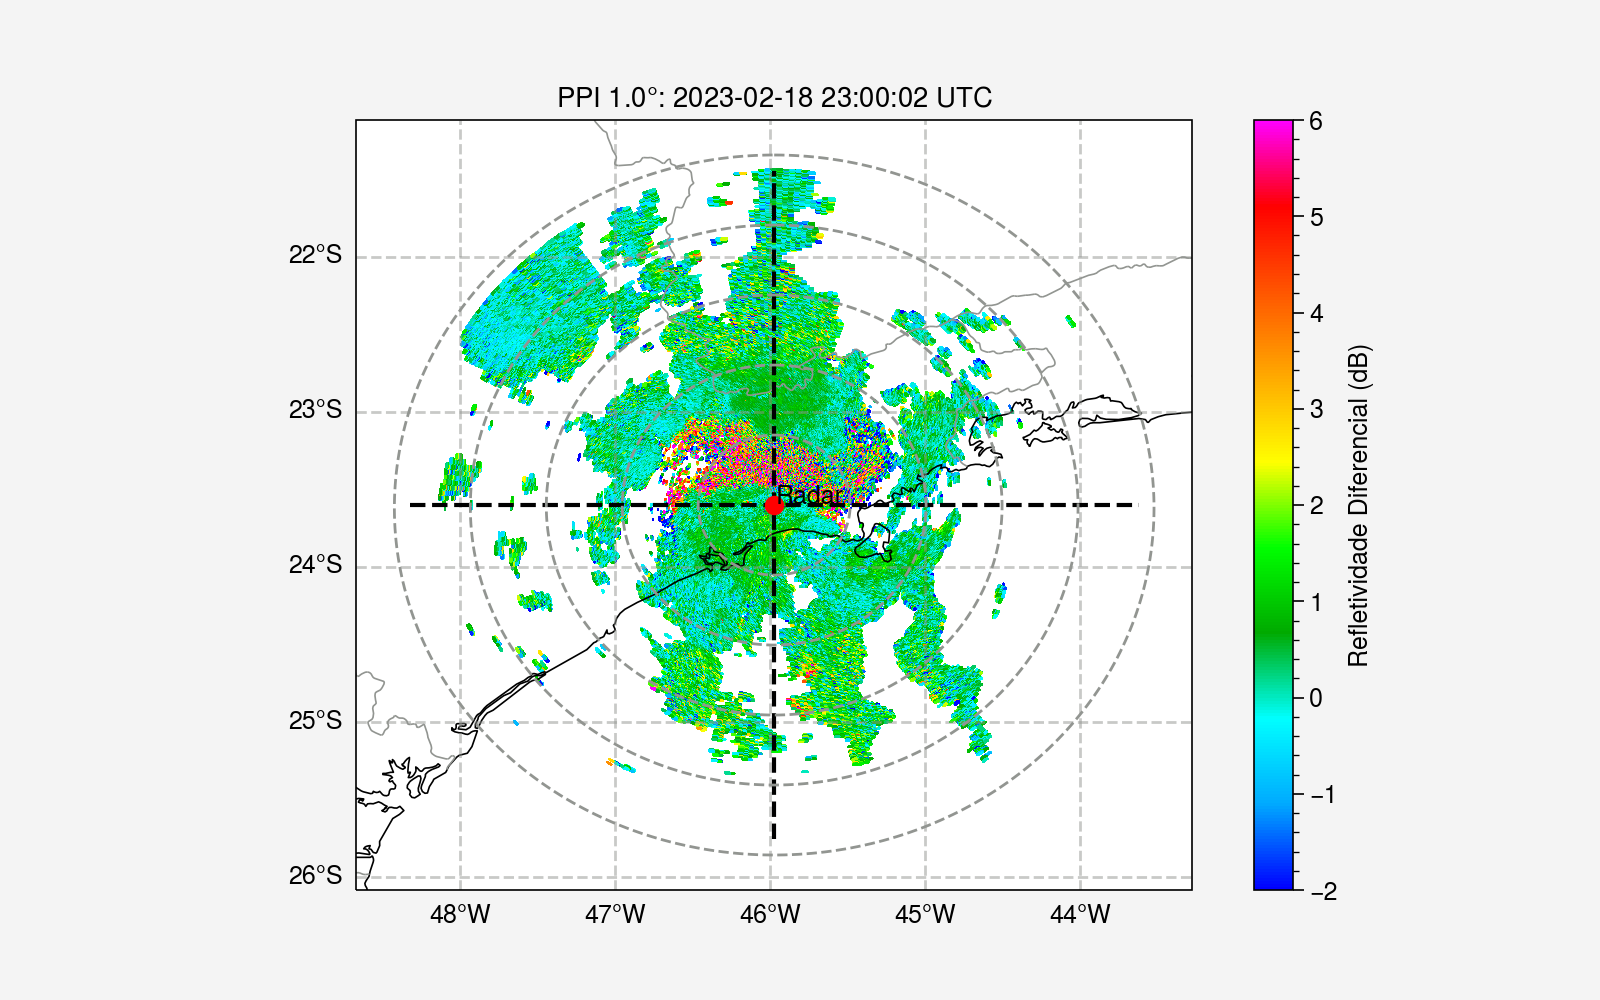

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 0 #(=primeira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# cria o display
display = pyart.graph.RadarMapDisplay(radar)

# setting projection
projection = ccrs.PlateCarree(central_longitude=lon_radar)

# cria moldura da figura
fig = plt.figure(figsize=[8,5])

# plota o mapa
display.plot_ppi_map('corrected_differential_reflectivity',
                     sweep=level,
                     vmin=-2,
                     vmax=6,
                     fig=fig,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     projection=projection,
                     resolution='10m',
                     colorbar_label='Refletividade Diferencial (dB)',
                     mask_outside=False,
                     title=f'PPI {str_level}$\degree$: {data} UTC')

# cross hairs
display.plot_line_geo(np.array([lon_radar, lon_radar]), np.array([latmin, latmax]), linestyle='--', color='black')
display.plot_line_geo(np.array([lonmin, lonmax]), np.array([lat_radar, lat_radar]), linestyle='--', color='black')

# plota aneis de distância
display.plot_range_rings([50, 100, 150, 200, 250], ls='--', lw=1, col='gray')

# indica a localização do radar com um ponto
display.plot_point(lon_radar, lat_radar, symbol='o', label_text='Radar', color='red')

# plota as linhas de latitudes e longitudes
ax = plt.gca()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# salva figura
plt.savefig(f'{dir}output/AULA_09a_ppi_{str_level}graus_{data}.png',
            bbox_inches='tight',
            dpi=300)

Vamos plotar num mesmo mapa as quatro variáveis:
1. Refletividade Corrigida - ZH
2. Refletividade Diferencial Corrigida - ZDR
3. Fase Diferencial Específica - KDP
4. Coeficiente de Correlação - RhoHV

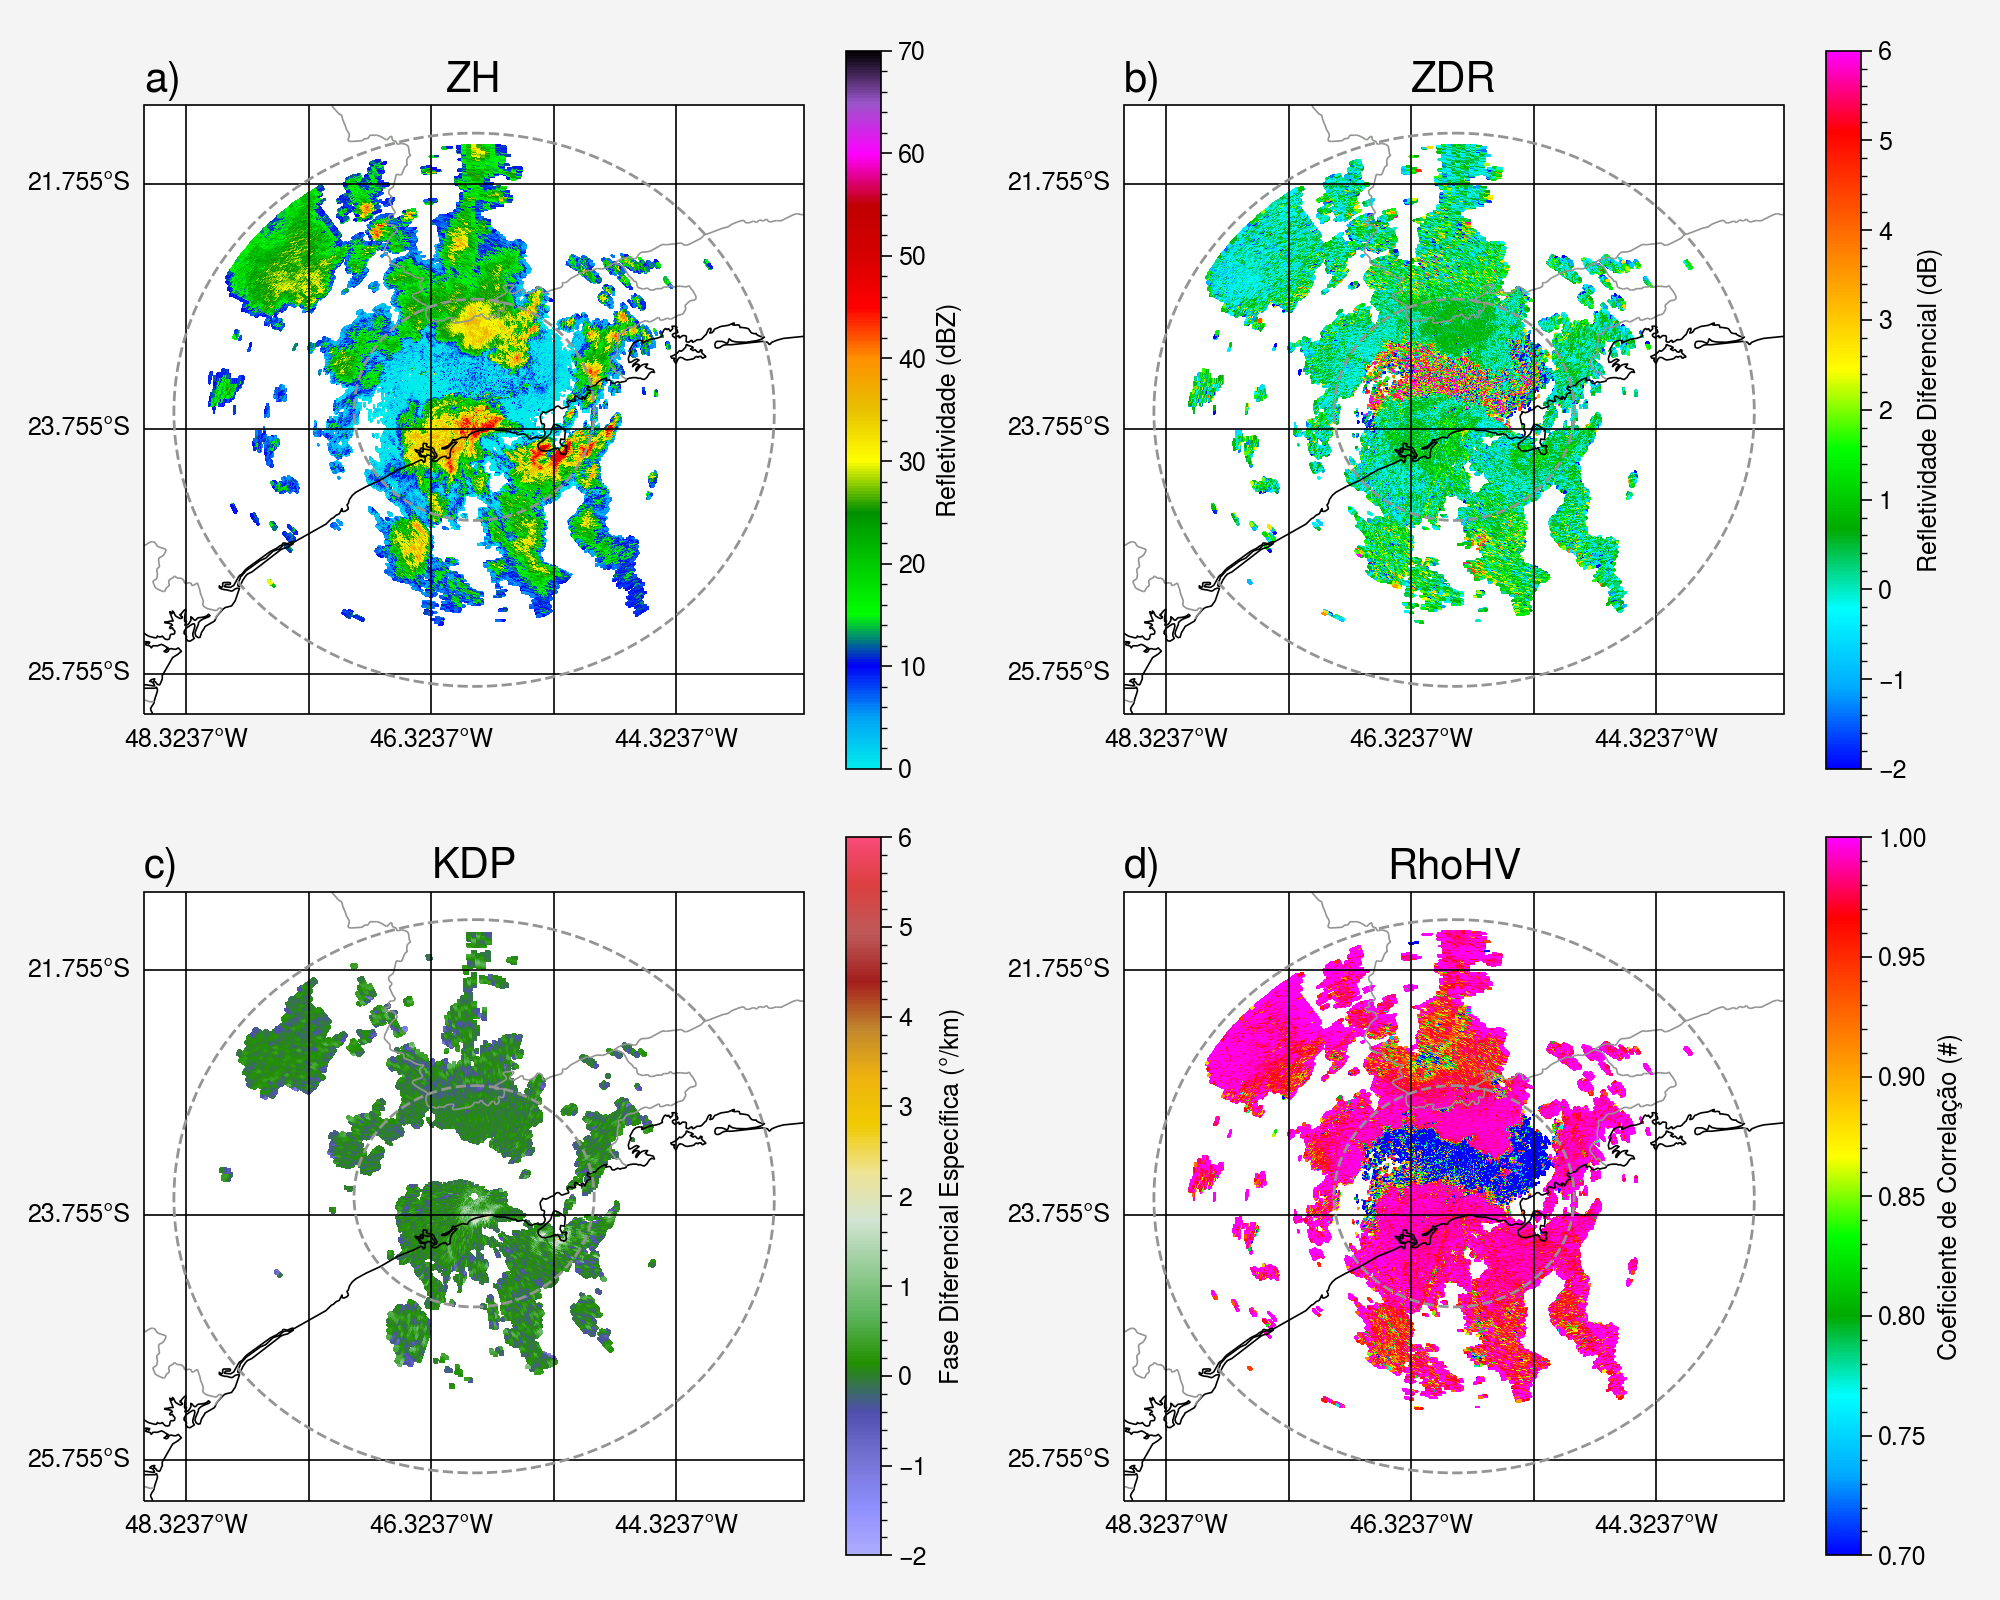

In [ ]:
#========================================================================================================================#
#                                             LEITURA DO DADO DE RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude e longitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define a elevação
level = 0 #(=primeira elevação)

# extrai o ângulo de elevação da primeira elevação (level=0)
str_level = str(radar.fixed_angle["data"][level])

# moldura da figura
fig = plt.figure(figsize=(10,8))

# cria o objeto display
display = pyart.graph.RadarMapDisplay(radar)

#==========================#
#       FIGURA 1: ZH
#==========================#
# moldura da figura
ax1 = plt.subplot(221, projection=ccrs.PlateCarree())

# plota o mapa
display.plot_ppi_map('corrected_reflectivity',
                     sweep=level,
                     vmin=0,
                     vmax=70,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     lat_lines=np.arange(latmin, latmax, 2),
                     lon_lines=np.arange(lonmin, lonmax, 1),
                     resolution='10m',
                     colorbar_label='Refletividade (dBZ)',
                     mask_outside=False,
                     ax=ax1,
                     cmap='pyart_NWSRef')

# título da figura
plt.title('ZH', fontsize=15)
plt.title('a)', loc='left', fontsize=15)

# plota aneis de distância
display.plot_range_rings([100, 250], ax=ax1, col='gray', ls='--', lw=1)

#==========================#
#      FIGURA 2: ZDR
#==========================#
# moldura da figura
ax2 = plt.subplot(222, projection=ccrs.PlateCarree())

# plota ppi
display.plot_ppi_map('corrected_differential_reflectivity',
                     sweep=level,
                     vmin=-2,
                     vmax=6,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     lat_lines=np.arange(latmin, latmax, 2),
                     lon_lines=np.arange(lonmin, lonmax, 1),
                     resolution='10m',
                     colorbar_label='Refletividade Diferencial (dB)',
                     mask_outside=False,
                     ax=ax2)

# título da figura
plt.title('ZDR', fontsize=15)
plt.title('b)', loc='left', fontsize=15)

# plota aneis de distância
display.plot_range_rings([100, 250], ax=ax2, col='gray', ls='--', lw=1)

#==========================#
#     FIGURA 3: KDP
#==========================#
# moldura da figura
ax3 = plt.subplot(223, projection=ccrs.PlateCarree())

# plota ppi
display.plot_ppi_map('specific_differential_phase',
                     sweep=level,
                     vmin=-2,
                     vmax=6,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     lat_lines=np.arange(latmin, latmax, 2),
                     lon_lines=np.arange(lonmin, lonmax, 1),
                     resolution='10m',
                     colorbar_label='Fase Diferencial Específica ($\degree$/km)',
                     mask_outside=False,
                     ax=ax3)

# título da figura
plt.title('KDP', fontsize=15)
plt.title('c)', loc='left', fontsize=15)

# plota aneis de distância
display.plot_range_rings([100, 250], ax=ax3, col='gray', ls='--', lw=1)

#==========================#
#     FIGURA 4: COR
#==========================#
# moldura da figura
ax4 = plt.subplot(224, projection=ccrs.PlateCarree())

# plota ppi
display.plot_ppi_map('cross_correlation_ratio',
                     sweep=level,
                     vmin=0.7,
                     vmax=1,
                     lat_0=lat_radar,
                     lon_0=lon_radar,
                     lat_lines=np.arange(latmin, latmax, 2),
                     lon_lines=np.arange(lonmin, lonmax, 1),
                     resolution='10m',
                     colorbar_label='Coeficiente de Correlação (#)',
                     mask_outside=False,
                     ax=ax4)

# título da figura
plt.title('RhoHV', fontsize=15)
plt.title('d)', loc='left', fontsize=15)

# plota aneis de distância
display.plot_range_rings([100, 250], ax=ax4, col='gray', ls='--', lw=1)

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_09b_ppi_{str_level}graus_{data}.png',
            bbox_inches='tight',
            dpi=300)

#**AULA 08** - MÁXIMA REFLETIVIDADE - `Esta aula ainda não está disponível`

#**AULA 09** - VENTO RADIAL - `Esta aula ainda não está disponível`

#**AULA 10** - ESTIMATIVA DA TAXA DE PRECIPITAÇÃO

## 1) Usando as funções nativas do Py-ART.
- Existem diversas relações para calcular a precipitação através das variáveis fornecidas pelo radar. Usaremos como exemplo aquelas [fornecidas](https://arm-doe.github.io/pyart/API/generated/pyart.retrieve.html) pelo Py-ART. Utilizaremos três relações:

    1. [retrieve.est_rain_rate_z](https://arm-doe.github.io/pyart/API/generated/pyart.retrieve.est_rain_rate_z.html): estima a precipitação através de Lei de potência com a refletividade (`Z-R`).

    2. [retrieve.est_rain_rate_kdp](https://arm-doe.github.io/pyart/API/generated/pyart.retrieve.est_rain_rate_kdp.html): estima a precipitação através da Lei de potência com o KDP (`KDP-R`).  
   
    3. [retrieve.est_rain_rate_zkdp](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.retrieve.est_rain_rate_zkdp.html): estima a precipitação através da combinação da Lei de potência com a chuva-KDP e chuva-refletividade (`KDP-R` e `Z-R`).

CPU times: user 5.46 s, sys: 267 ms, total: 5.72 s
Wall time: 5.57 s


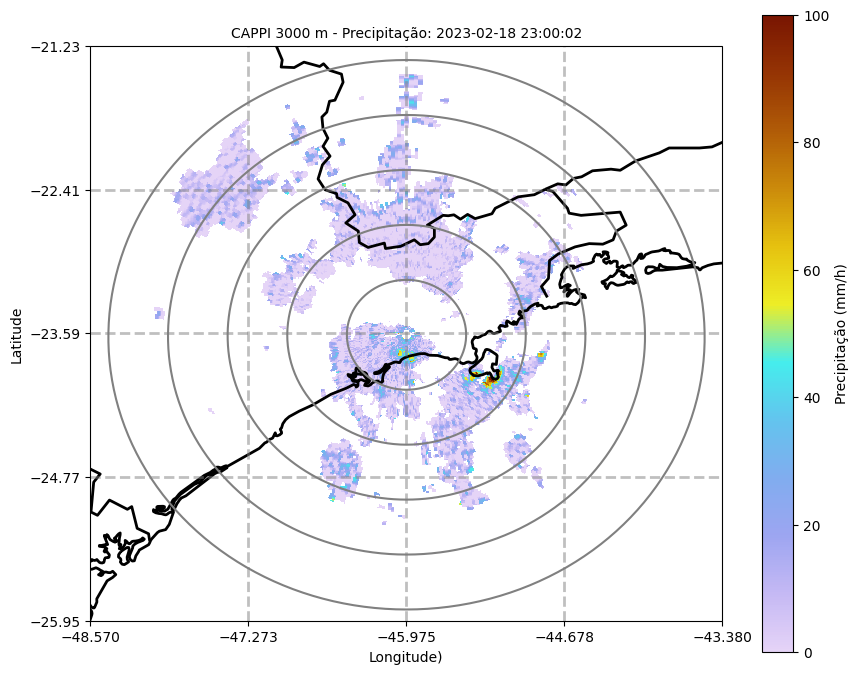

In [ ]:
%%time
#========================================================================================================================#
#                                                LEITURA DADO DO RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude, longitude e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                CALCULA PRECIPITAÇÃO
#========================================================================================================================#
# calcula a precipitação através de 3 métodos diferentes

# a) Z-R
chuva_zr = pyart.retrieve.est_rain_rate_z(radar,
                                          refl_field='corrected_reflectivity')

# b) KDP-R
chuva_dp = pyart.retrieve.est_rain_rate_kdp(radar, kdp_field='specific_differential_phase')

# c) Z-R e KDP-R
chuva_zdp = pyart.retrieve.est_rain_rate_zkdp(radar,
                                              refl_field='corrected_reflectivity',
                                              thresh_max=True,
                                              thresh=40)

# adiciona os campos criados na estrutura do objeto "radar"
radar.add_field('chuva_zr', chuva_zr)
radar.add_field('chuva_dp', chuva_dp)
radar.add_field('chuva_zdp', chuva_zdp)

#========================================================================================================================#
#                                                 GERA CAPPI
#========================================================================================================================#
# gera o cappi
cappi = pyart.map.grid_from_radars(radar, grid_shape=(1, 500, 500),
                                   grid_limits=((3000 - altitude, 3000 - altitude),
                                                (-250000., 250000.),
                                                (-250000, 250000.)),
                                   grid_origin = (lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam', min_radius=2000.0,
                                   weighting_function='Nearest')

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# moldura da figura
fig = plt.figure(figsize=(9, 7))

# definição dos eixos da figura
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# cria o display
display = pyart.graph.GridMapDisplay(cappi)

# corrige o nível do cappi levando em conta a altitude do radar
# para mostrar corretamente no título da figura
display.grid.z['data'] = display.grid.z['data'] + altitude

# plota o mapa
display.plot_grid("chuva_dp",
                  level=0,
                  vmin=0,
                  vmax=100,
                  cmap='pyart_LangRainbow12',
                  ax=ax,
                  colorbar_label='Precipitação (mm/h)',
                  mask_outside=False)

# nome dos eixos x e y
ax.set_xlabel('Longitude)')
ax.set_ylabel('Latitude')

# título da figura
plt.title(f'CAPPI {int(display.grid.z["data"][0])} m - Precipitação: {data}', fontsize=10)

# Plota os aneis de distancia do radar
evm_plota_aneis_em_geral([50,100,150,200,250], lon_radar, lat_radar, 'grey', label='')

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_07a_precipitacao_{data}.png', dpi=300)

Vamos verificar as variáveis existentes no CAPPI.

In [ ]:
cappi.fields.keys()

dict_keys(['corrected_differential_reflectivity', 'spectrum_width', 'corrected_differential_phase', 'cross_correlation_ratio', 'reflectivity', 'chuva_zr', 'corrected_reflectivity', 'chuva_zdp', 'chuva_dp', 'differential_phase', 'corrected_velocity', 'specific_differential_phase', 'ROI'])

## 2) Calcula a precipitação utilizando uma relação Z-ZDR-KDP para radar Banda-S - [Ryzhkov et al (2005)](https://journals.ametsoc.org/view/journals/apme/44/4/jam2213.1.xml). Nessa formulação iremos utilizar Z, ZDR e KDP para estimar a precipitação, como explicado a seguir:

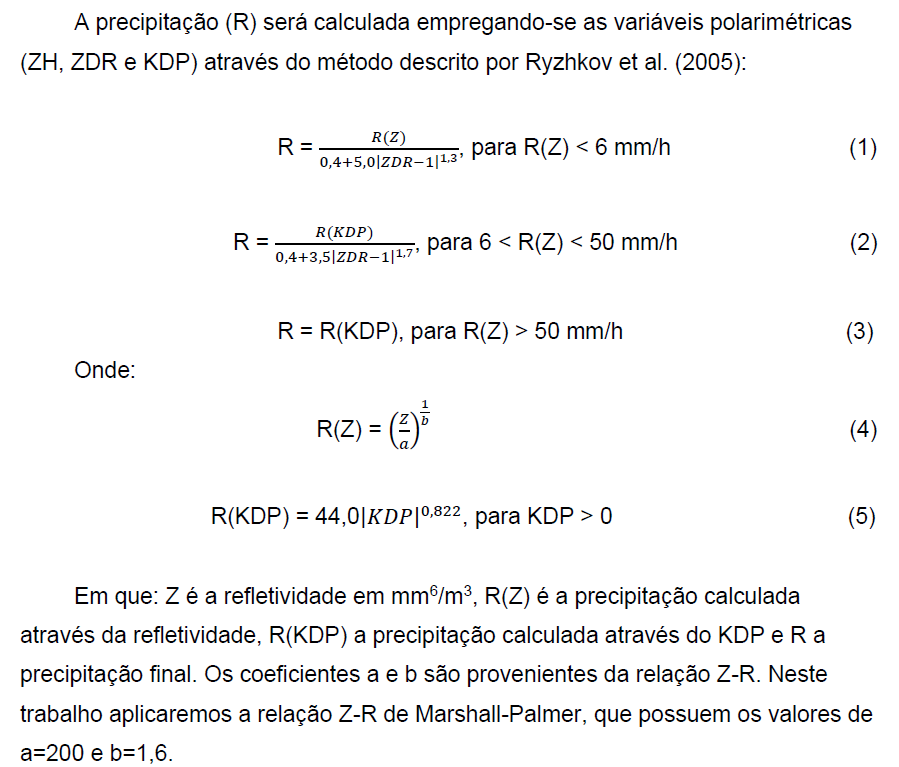

CPU times: user 5.82 s, sys: 388 ms, total: 6.21 s
Wall time: 6 s


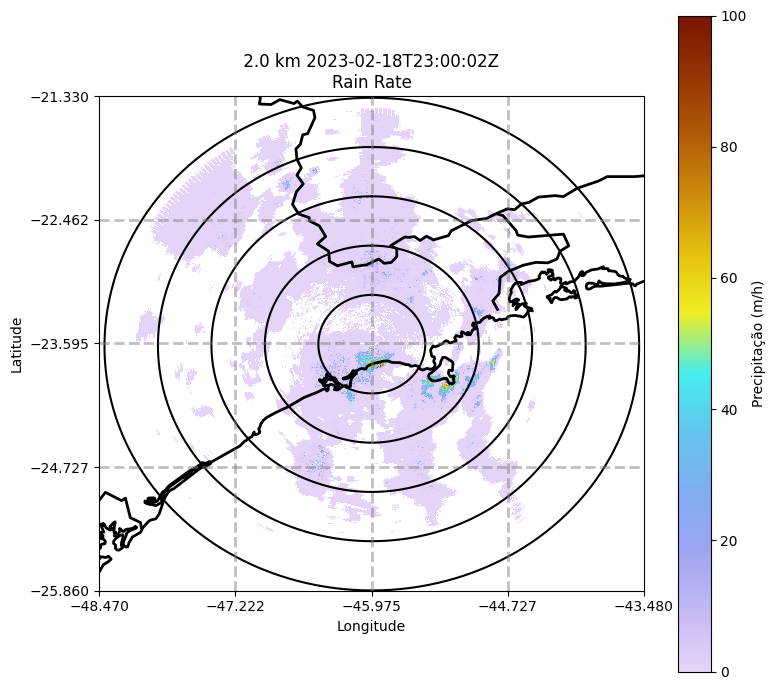

In [ ]:
%%time
#========================================================================================================================#
#                                                LEITURA DADO DO RADAR
#========================================================================================================================#
# leitura do arquivo
filename = 'PNOVA2-20230218230002.HDF5'
radar = pyart.aux_io.read_gamic(f'{dir}input/{filename}')

# extrai a latitude, longitude e altitude do radar
lat_radar, lon_radar = radar.latitude['data'][0], radar.longitude['data'][0]
altitude = radar.altitude['data'][0]

# limites dos dados
latmin, latmax = radar.gate_latitude['data'].min(), radar.gate_latitude['data'].max()
lonmin, lonmax = radar.gate_longitude['data'].min(), radar.gate_longitude['data'].max()

# extrai a data do dado do radar
data = pyart.util.datetime_from_grid(radar)

#========================================================================================================================#
#                                                CALCULA PRECIPITAÇÃO
#========================================================================================================================#
# guarda os campos de cada variável
refl = radar.fields['corrected_reflectivity']['data']
zdr = radar.fields['corrected_differential_reflectivity']['data']
kdp = radar.fields['specific_differential_phase']['data']

# chuva usando somente KDP
rkdp = 44.0 * np.ma.power(abs(kdp), 0.822)

# Marshall Palmer para Z-R
z = np.ma.power(10.0, refl/10) # transforma de dBZ para mm6/m3
r_zr = (np.ma.power(z/200, 1/1.6))

# copia o campo r_zr como matriz de saida
rain = r_zr

# agora verifica os limiares para uso com Z-ZDR-KDP
idx = np.where(r_zr <= 6)
rain[idx] = r_zr[idx] / (0.4 + 5.0 * np.ma.power(abs(zdr[idx] - 1), 1.3))

idx = np.where(r_zr > 6)
rain[idx] = rkdp[idx] / (0.4 + 3.5 * np.ma.power(abs(zdr[idx] - 1), 1.7))

idx = np.where(r_zr > 50)
rain[idx] = rkdp[idx]

#========================================================================================================================#
#                                                ADICIONA O CAMPO DE PRECIPITAÇÃO
#========================================================================================================================#
# insere o campo calculado no volume de dbz para poder calcular o cappi e retirar as informações que vem no cabeçalho do arquivo original.
# maiores informações sobre a função [.add_field_like](https://arm-doe.github.io/pyart-docs-travis/API/generated/pyart.core.Radar.add_field_like.html) do Py-ART.

radar.add_field_like('corrected_reflectivity', 'rain_rate', rain)
radar.fields['rain_rate']['units'] = 'mm/h'
radar.fields['rain_rate']['standard_name'] = 'Rain_Rate'
radar.fields['rain_rate']['long_name'] = 'Rain Rate'

#========================================================================================================================#
#                                                 GERA CAPPI
#========================================================================================================================#
cappi = pyart.map.grid_from_radars(radar, grid_shape=(3, 480, 480),
                                   grid_limits=((2000.0 - altitude, 4000.0 - altitude),
                                                (-240000., 240000.),
                                                (-240000, 240000.)),
                                   grid_origin = (lat_radar, lon_radar),
                                   gridding_algo='map_gates_to_grid',
                                   roi_func='dist_beam', min_radius=2000.0,
                                   weighting_function='Nearest')

#========================================================================================================================#
#                                                     PLOTA FIGURA
#========================================================================================================================#
# define o tamanho da figura
fig = plt.figure(figsize=(8, 7))

# define os eixos e projeção da figura
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

# monta um objeto "display" do Py-ART
display = pyart.graph.GridMapDisplay(cappi)

# corrige o nível do cappi levando em conta a altitude do radar
# para mostrar corretamente no título da figura
display.grid.z['data'] = display.grid.z['data'] + altitude

# plota o cappi - como temos 3 niveis, o nivel 0 = 2000, 1 = 3000 e 2 = 4000 m
display.plot_grid("rain_rate",
                  level=0,
                  vmin=0,
                  vmax=100,
                  cmap='pyart_LangRainbow12',
                  ax=ax,
                  colorbar_label='Precipitação (m/h)',
                  mask_outside=True)

# nomes dos eixos de longitude e latitude
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# plota os aneis de distância do radar
evm_plota_aneis_em_geral([50,100,150,200,250], lon_radar, lat_radar, 'black', label='')

# recorta figura
plt.tight_layout()

# salva figura
plt.savefig(f'{dir}output/AULA_07b_precipitacao_{data}.png', dpi=300)

In [ ]:
# mostra os campos disponíveis
pd.DataFrame(cappi.fields.keys())

0
0   corrected_differential_reflectivity
1                        spectrum_width
2          corrected_differential_phase
3               cross_correlation_ratio
4                          reflectivity
5                             rain_rate
6                corrected_reflectivity
7                    differential_phase
8                    corrected_velocity
9           specific_differential_phase
10                                  ROI

#**AULA 11** - ACUMULADO DE PRECIPITAÇÃO - `Esta aula ainda não está disponível`

#**AULA 12** - CLASSIFICAÇÃO DE HIDROMETEOROS - `Esta aula ainda não está disponível`

#**AULA 13** - CLASSIFICAÇÃO CONVECTIVO/ESTATIFORME - `Esta aula ainda não está disponível`

#**AULA 14** - PERFIS VERTICAIS DE RADAR - `Esta aula ainda não está disponível`

#**AULA 15** - COMBINAÇÃO DE DADOS DE RADAR COM RELÂMPAGOS - `Esta aula ainda não está disponível`